In [209]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt 
import os

In [210]:
chile_df = pd.read_csv('data/chile.csv',  low_memory=False)
argentina_df = pd.read_csv('data/argentina.csv',  low_memory=False)
antartica_df = pd.read_csv('data/antartica.csv',  low_memory=False)

In [211]:
#info que muestre todos los datos 
chile_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no  

In [212]:
argentina_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no

In [213]:
antartica_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 146 columns):
 #    Column               Dtype  
---   ------               -----  
 0    occurrence_no        int64  
 1    record_type          object 
 2    reid_no              float64
 3    flags                object 
 4    collection_no        int64  
 5    accepted_name        object 
 6    accepted_attr        float64
 7    accepted_rank        object 
 8    accepted_no          float64
 9    early_interval       object 
 10   late_interval        object 
 11   max_ma               float64
 12   min_ma               float64
 13   ref_author           object 
 14   ref_pubyr            int64  
 15   reference_no         int64  
 16   phylum               object 
 17   phylum_no            object 
 18   class                object 
 19   class_no             object 
 20   order                object 
 21   order_no             object 
 22   family               object 
 23   family_no

Como grupo fuimos viendo manualmente que columnas nos servirian para poder responder las preguntas planteadas en la propuesta inicial, y llegamos a un concenso de elegir las siguientes 19 columnas como base para poder responder estas.

In [214]:
columns = [
    'species_name',
    'occurrence_no',
    'accepted_name',
    'early_interval',
    'late_interval',
    'phylum',
    'class',
    'order',
    'family',
    'genus',
    'lat',
    'lng',
    'diet',
    'life_habit',
    "environment",
    "taxon_environment",
    "primary_name"
]

#Hacer que los df solo tengan las columnas que necesitamos
chile_df = chile_df[columns].copy()
argentina_df = argentina_df[columns].copy()
antartica_df = antartica_df[columns].copy()

In [215]:
chile_df

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name
0,ceciliana,16417,Leionucula,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula
1,amuriensis,16418,Nuculana,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana
2,cuneiformis,16419,Nuculana,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana
3,levitestata,16420,Yoldia,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculanida,Yoldiidae,Yoldia,-37.000000,-73.000000,deposit feeder,infaunal,NaN,"inner shelf,outer shelf,oceanic",Yoldia
4,pencana,16421,Neiloides,Maastrichtian,NaN,Mollusca,Bivalvia,Nuculida,NO_FAMILY_SPECIFIED,Neiloides,-37.000000,-73.000000,deposit feeder,infaunal,NaN,NaN,Neiloides
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,sp.,1659402,Ostrea,Turonian,Campanian,Mollusca,Bivalvia,Ostreida,Ostreidae,Ostrea,-50.884998,-72.625000,suspension feeder,epifaunal,basinal (siliciclastic),"hypersaline,marine,brackish",Ostrea
9477,antarctica,1659403,Cucullaea antarctica,Turonian,Campanian,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-50.884998,-72.625000,suspension feeder,infaunal,basinal (siliciclastic),NaN,Cucullaea
9478,sp.,1659404,Nucula,Turonian,Campanian,Mollusca,Bivalvia,Nuculida,Nuculidae,Nucula,-50.884998,-72.625000,"deposit feeder, suspension feeder",infaunal,basinal (siliciclastic),"coastal,inner shelf,outer shelf,oceanic",Nucula
9479,saladensis,1660104,Micrauchenia saladensis,Tortonian,Messinian,Chordata,Mammalia,Panameriungulata,Macraucheniidae,Micrauchenia,-27.684723,-70.949997,herbivore,scansorial,coastal indet.,terrestrial,Micrauchenia


In [216]:
obtener_duplicados_chile = chile_df.duplicated(keep=False)
datos_duplicados_chile = chile_df[obtener_duplicados_chile]
datos_duplicados_chile

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name


In [217]:
obtener_duplicados_argentina = chile_df.duplicated(keep=False)
datos_duplicados_argentina = chile_df[obtener_duplicados_argentina]
datos_duplicados_argentina

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name


In [218]:
obtener_duplicados_antartica = antartica_df.duplicated(keep=False)
datos_duplicados_antartica = antartica_df[obtener_duplicados_antartica]
datos_duplicados_antartica

,species_name,occurrence_no,accepted_name,early_interval,late_interval,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name


Notamos que no hay datos duplicados, por ende no es necesario realizar ninguna acción adicional para eliminar duplicados.

In [219]:
chile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       9481 non-null   object 
 1   occurrence_no      9481 non-null   int64  
 2   accepted_name      9343 non-null   object 
 3   early_interval     9481 non-null   object 
 4   late_interval      1605 non-null   object 
 5   phylum             9337 non-null   object 
 6   class              9292 non-null   object 
 7   order              9123 non-null   object 
 8   family             8914 non-null   object 
 9   genus              8574 non-null   object 
 10  lat                9481 non-null   float64
 11  lng                9481 non-null   float64
 12  diet               8749 non-null   object 
 13  life_habit         8743 non-null   object 
 14  environment        9402 non-null   object 
 15  taxon_environment  5847 non-null   object 
 16  primary_name       9481 

In [220]:
argentina_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31881 entries, 0 to 31880
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       31881 non-null  object 
 1   occurrence_no      31881 non-null  int64  
 2   accepted_name      31253 non-null  object 
 3   early_interval     31881 non-null  object 
 4   late_interval      5288 non-null   object 
 5   phylum             31226 non-null  object 
 6   class              31038 non-null  object 
 7   order              29738 non-null  object 
 8   family             29056 non-null  object 
 9   genus              27398 non-null  object 
 10  lat                31881 non-null  float64
 11  lng                31881 non-null  float64
 12  diet               24717 non-null  object 
 13  life_habit         22808 non-null  object 
 14  environment        31192 non-null  object 
 15  taxon_environment  18471 non-null  object 
 16  primary_name       318

In [221]:
antartica_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11311 entries, 0 to 11310
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       11311 non-null  object 
 1   occurrence_no      11311 non-null  int64  
 2   accepted_name      10977 non-null  object 
 3   early_interval     11311 non-null  object 
 4   late_interval      2888 non-null   object 
 5   phylum             10960 non-null  object 
 6   class              10926 non-null  object 
 7   order              10744 non-null  object 
 8   family             10604 non-null  object 
 9   genus              10375 non-null  object 
 10  lat                11311 non-null  float64
 11  lng                11311 non-null  float64
 12  diet               7706 non-null   object 
 13  life_habit         6012 non-null   object 
 14  environment        10351 non-null  object 
 15  taxon_environment  5410 non-null   object 
 16  primary_name       113

In [222]:
chile_df['era_early'] = None
argentina_df['era_early'] = None
antartica_df['era_early'] = None

In [223]:
chile_df['era_late'] = None
argentina_df['era_late'] = None
antartica_df['era_late'] = None

In [224]:
cambrian_intervals = [
    "Early Terreneuvian", "Middle Terreneuvian", "Late Terreneuvian", "Terreneuvian",
    "Early Series 2", "Middle Series 2", "Late Series 2", "Series 2",
    "Early Miaolingian", "Middle Miaolingian", "Late Miaolingian", "Miaolingian",
    "Early Furongian", "Middle Furongian", "Late Furongian", "Furongian",
    "Early Fortunian", "Middle Fortunian", "Late Fortunian", "Fortunian",
    "Early Stage 2", "Middle Stage 2", "Late Stage 2", "Stage 2",
    "Early Stage 3", "Middle Stage 3", "Late Stage 3", "Stage 3",
    "Early Stage 4", "Middle Stage 4", "Late Stage 4", "Stage 4",
    "Early Wuliuan", "Middle Wuliuan", "Late Wuliuan", "Wuliuan",
    "Early Drumian", "Middle Drumian", "Late Drumian", "Drumian",
    "Early Guzhangian", "Middle Guzhangian", "Late Guzhangian", "Guzhangian",
    "Early Paibian", "Middle Paibian", "Late Paibian", "Paibian",
    "Early Jiangshanian", "Middle Jiangshanian", "Late Jiangshanian", "Jiangshanian",
    "Early Stage 10", "Middle Stage 10", "Late Stage 10", "Stage 10","Middle Cambrian", "Atdabanian",
    "Toyonian", "Botomian", "Early Cambrian", 'Floran', 'Lenian', 'Dresbachian',
    'Dolgellian', 'Merioneth', 'Trempealeauan', 'Idamean',
       'Sunwaptan','St Davids', 'Solvan', 'Dyeran', 'Wonokan',
        'Tulean', 'Blackhillsian'

]


silurian_intervals = [
    "Early Rhuddanian", "Middle Rhuddanian", "Late Rhuddanian", "Rhuddanian",
    "Early Aeronian", "Middle Aeronian", "Late Aeronian", "Aeronian",
    "Early Telychian", "Middle Telychian", "Late Telychian", "Telychian",
    "Early Sheinwoodian", "Middle Sheinwoodian", "Late Sheinwoodian", "Sheinwoodian",
    "Early Homerian", "Middle Homerian", "Late Homerian", "Homerian",
    "Early Gorstian", "Middle Gorstian", "Late Gorstian", "Gorstian",
    "Early Ludfordian", "Middle Ludfordian", "Late Ludfordian", "Ludfordian",
    "Early Llandovery", "Middle Llandovery", "Late Llandovery", "Llandovery",
    "Early Wenlock", "Middle Wenlock", "Late Wenlock", "Wenlock",
    "Early Ludlow", "Middle Ludlow", "Late Ludlow", "Ludlow",
    "Early Pridoli", "Middle Pridoli", "Late Pridoli", "Pridoli"
]


devonian_intervals = [
    "Early Lochkovian", "Middle Lochkovian", "Late Lochkovian", "Lochkovian",
    "Early Pragian", "Middle Pragian", "Late Pragian", "Pragian",
    "Early Emsian", "Middle Emsian", "Late Emsian", "Emsian",
    "Early Eifelian", "Middle Eifelian", "Late Eifelian", "Eifelian",
    "Early Givetian", "Middle Givetian", "Late Givetian", "Givetian",
    "Early Fransnian", "Middle Fransnian", "Late Fransnian", "Fransnian",
    "Early Famennian", "Middle Famennian", "Late Famennian", "Famennian",
    "Early Devonian", "Middle Devonian", "Late Devonian"
]


carboniferous_intervals = [
    "Early Tournaisian", "Middle Tournaisian", "Late Tournaisian", "Tournaisian",
    "Early Visean", "Middle Visean", "Late Visean", "Visean",
    "Early Serpukhovian", "Middle Serpukhovian", "Late Serpukhovian", "Serpukhovian",
    "Early Bashkirian", "Middle Bashkirian", "Late Bashkirian", "Bashkirian",
    "Early Moscovian", "Middle Moscovian", "Late Moscovian", "Moscovian",
    "Early Kasimovian", "Middle Kasimovian", "Late Kasimovian", "Kasimovian",
    "Early Gzhelian", "Middle Gzhelian", "Late Gzhelian", "Gzhelian",
    "Early Mississippian", "Middle Mississippian", "Late Mississippian", "Mississippian",
    "Early Pennsylvanian", "Middle Pennsylvanian", "Late Pennsylvanian", "Pennsylvanian",
    'Namurian', 'Virgilian', "Arnsbergian", 
]

permian_intervals = [
    "Early Asselian", "Middle Asselian", "Late Asselian", "Asselian",
    "Early Sakmarian", "Middle Sakmarian", "Late Sakmarian", "Sakmarian",
    "Early Artinskian", "Middle Artinskian", "Late Artinskian", "Artinskian",
    "Early Kungurian", "Middle Kungurian", "Late Kungurian", "Kungurian",
    "Early Roadian", "Middle Roadian", "Late Roadian", "Roadian",
    "Early Wordian", "Middle Wordian", "Late Wordian", "Wordian",
    "Early Capitanian", "Middle Capitanian", "Late Capitanian", "Capitanian",
    "Early Wuchiapingian", "Middle Wuchiapingian", "Late Wuchiapingian", "Wuchiapingian",
    "Early Changhsingian", "Middle Changhsingian", "Late Changhsingian", "Changhsingian",
    "Early Cisuralian", "Middle Cisuralian", "Late Cisuralian", "Cisuralian",
    "Early Guadalupian", "Middle Guadalupian", "Late Guadalupian", "Guadalupian",
    "Early Lopingian", "Middle Lopingian", "Late Lopingian", "Lopingian"
]


ordovician_intervals = [
    "Early Ordovician", "Middle Ordovician", "Late Ordovician",
    "Early Tremadocian", "Middle Tremadocian", "Late Tremadocian", "Tremadocian",
    "Early Floian", "Middle Floian", "Late Floian", "Floian",
    "Early Dapingian", "Middle Dapingian", "Late Dapingian", "Dapingian",
    "Early Darriwilian", "Middle Darriwilian", "Late Darriwilian", "Darriwilian",
    "Early Sandbian", "Middle Sandbian", "Late Sandbian", "Sandbian",
    "Early Katian", "Middle Katian", "Late Katian", "Katian",
    "Early Hirnantian", "Middle Hirnantian", "Late Hirnantian", "Hirnantian",
    'Arenig', 'Early Llanvirn', 'Ibex', 'Tremadoc', 'Llanvirn', 'Gisbornian',
    'Caradoc', 'Early Llandeilo','Costonian', 'Actonian', 'Late Llandeilo',
    'Longvillian', 'Llandeilo', 'Arenigian', 'Late Llanvirn', 'Whiterockian',
    'Skullrockian', 'Stairsian'
]

triassic_intervals = [
    "Early Induan", "Middle Induan", "Late Induan", "Induan",
    "Early Anisian", "Middle Anisian", "Late Anisian", "Anisian",
    "Early Ladinian", "Middle Ladinian", "Late Ladinian", "Ladinian",
    "Early Carnian", "Middle Carnian", "Late Carnian", "Carnian",
    "Early Norian", "Middle Norian", "Late Norian", "Norian",
    "Early Rhaetian", "Middle Rhaetian", "Late Rhaetian", "Rhaetian",
    "Early Triassic", "Middle Triassic", "Late Triassic", 'Sevatian',
    'Olenekian', 'Longobardian'
]


neogene_intervals = [
    "Early Miocene", "Middle Miocene", "Late Miocene", "Miocene",
    "Early Pliocene", "Middle Pliocene", "Late Pliocene", "Pliocene",
    "Early Aquitanian", "Middle Aquitanian", "Late Aquitanian", "Aquitanian",
    "Early Burdigalian", "Middle Burdigalian", "Late Burdigalian", "Burdigalian",
    "Early Langhian", "Middle Langhian", "Late Langhian", "Langhian",
    "Early Serrevallian", "Middle Serrevallian", "Late Serrevallian", "Serrevallian",
    "Early Tortonian", "Middle Tortonian", "Late Tortonian", "Tortonian",
    "Early Messinian", "Middle Messinian", "Late Messinian", "Messinian",
    "Early Zanclean", "Middle Zanclean", "Late Zanclean", "Zanclean",
    "Early Piacenzian", "Middle Piacenzian", "Late Piacenzian", "Piacenzian",
    'Serravallian', 'Colhuehuapian', 'Santacrucian','Friasian',
    'Chasicoan', 'Montehermosan', 'Huayquerian', 'Chapadmalalan',
    'Colloncuran', 'Mayoan'
]


quaternary_intervals = [
    "Early Pleistocene", "Middle Pleistocene", "Late Pleistocene", "Pleistocene",
    "Early Gelasian", "Middle Gelasian", "Late Gelasian", "Gelasian",
    "Early Calabrian", "Middle Calabrian", "Late Calabrian", "Calabrian",
    "Early Chibanian", "Middle Chibanian", "Late Chibanian", "Chibanian",
    'Holocene', 'Lujanian', 'Ensenadan', 'Ionian', 'Uquian'
]


jurassic_intervals = [
    "Early Hettangian", "Middle Hettangian", "Late Hettangian", "Hettangian",
    "Early Sinemurian", "Middle Sinemurian", "Late Sinemurian", "Sinemurian",
    "Early Pliensbachian", "Middle Pliensbachian", "Late Pliensbachian", "Pliensbachian",
    "Early Toarcian", "Middle Toarcian", "Late Toarcian", "Toarcian",
    "Early Aalenian", "Middle Aalenian", "Late Aalenian", "Aalenian",
    "Early Bajocian", "Middle Bajocian", "Late Bajocian", "Bajocian",
    "Early Bathonian", "Middle Bathonian", "Late Bathonian", "Bathonian",
    "Early Callovian", "Middle Callovian", "Late Callovian", "Callovian",
    "Early Oxfordian", "Middle Oxfordian", "Late Oxfordian", "Oxfordian",
    "Early Kimmeridgian", "Middle Kimmeridgian", "Late Kimmeridgian", "Kimmeridgian",
    "Early Tithonian", "Middle Tithonian", "Late Tithonian", "Tithonian",
    "Early Jurassic", "Middle Jurassic", "Late Jurassic", 'Planorbis',
    'Margaritatus', 'Variabilis', 'Opalinum','Angulata', 'Obtusum',
    'Falciferum', 'Bifrons', 'Murchisonae', 'Jamesoni', 'Spinatum',
    'Davoei', 'Liasicus', 'Bucklandi', 'Concavum'
]


paleogene_intervals = [
    "Early Paleocene", "Middle Paleocene", "Late Paleocene", "Paleocene",
    "Early Eocene", "Middle Eocene", "Late Eocene", "Eocene",
    "Early Oligocene", "Middle Oligocene", "Late Oligocene", "Oligocene",
    "Early Danian", "Middle Danian", "Late Danian", "Danian",
    "Early Selandian", "Middle Selandian", "Late Selandian", "Selandian",
    "Early Thanetian", "Middle Thanetian", "Late Thanetian", "Thanetian",
    "Early Ypresian", "Middle Ypresian", "Late Ypresian", "Ypresian",
    "Early Lutetian", "Middle Lutetian", "Late Lutetian", "Lutetian",
    "Early Bartonian", "Middle Bartonian", "Late Bartonian", "Bartonian",
    "Early Priabonian", "Middle Priabonian", "Late Priabonian", "Priabonian",
    "Early Rupelian", "Middle Rupelian", "Late Rupelian", "Rupelian",
    "Early Chattian", "Middle Chattian", "Late Chattian", "Chattian",
    'Casamayoran', 'Tinguirirican', 'Riochican', 'Deseadan', 'Mustersan',
    'Divisaderan'
]

cretaceous_intervals = [
    "Early Berriasian", "Middle Berriasian", "Late Berriasian", "Berriasian",
    "Early Valanginian", "Middle Valanginian", "Late Valanginian", "Valanginian",
    "Early Hauterivian", "Middle Hauterivian", "Late Hauterivian", "Hauterivian",
    "Early Barremian", "Middle Barremian", "Late Barremian", "Barremian",
    "Early Aptian", "Middle Aptian", "Late Aptian", "Aptian",
    "Early Albian", "Middle Albian", "Late Albian", "Albian",
    "Early Cenomanian", "Middle Cenomanian", "Late Cenomanian", "Cenomanian",
    "Early Turonian", "Middle Turonian", "Late Turonian", "Turonian",
    "Early Coniacian", "Middle Coniacian", "Late Coniacian", "Coniacian",
    "Early Santonian", "Middle Santonian", "Late Santonian", "Santonian",
    "Early Campanian", "Middle Campanian", "Late Campanian", "Campanian",
    "Early Maastrichtian", "Middle Maastrichtian", "Late Maastrichtian", "Maastrichtian",
    "Early Cretaceous", "Late Cretaceous", 'Neocomian','Senonian'
]

ediacaran_intervals = ["Ediacaran"]

cryogenian_intervals = ["Cryogenian"]

tonian_intervals = ["Tonian"]

siderian_intervals = ["Siderian"]
rhyacian_intervals = ["Rhyacian"]
orosirian_intervals = ["Orosirian"]
statherian_intervals = ["Statherian"]
calymmian_intervals = ["Calymmian"]
ectasian_intervals = ["Ectasian"]
stenian_intervals = ["Stenian"]

nan = [np.nan]

In [225]:
def assign_era(row):
    if row['early_interval'] in cambrian_intervals:
        return 'Cambrian'
    elif row['early_interval'] in ordovician_intervals:
        return 'Ordovician'
    elif row['early_interval'] in silurian_intervals:
        return 'Silurian'
    elif row['early_interval'] in devonian_intervals:
        return 'Devonian'
    elif row['early_interval'] in carboniferous_intervals:
        return 'Carboniferous'
    elif row['early_interval'] in permian_intervals:
        return 'Permian'
    elif row['early_interval'] in triassic_intervals:
        return 'Triassic'
    elif row['early_interval'] in jurassic_intervals:
        return 'Jurassic'
    elif row['early_interval'] in cretaceous_intervals:
        return 'Cretaceous'
    elif row['early_interval'] in paleogene_intervals:
        return 'Paleogene'
    elif row['early_interval'] in neogene_intervals:
        return 'Neogene'
    elif row['early_interval'] in quaternary_intervals:
        return 'Quaternary'
    elif row['early_interval'] in nan:
        return "No especificado"
    else:
        return row['early_interval']

In [226]:
def assign_era_late(row):
    if row['late_interval'] in cambrian_intervals:
        return 'Cambrian'
    elif row['late_interval'] in ordovician_intervals:
        return 'Ordovician'
    elif row['late_interval'] in silurian_intervals:
        return 'Silurian'
    elif row['late_interval'] in devonian_intervals:
        return 'Devonian'
    elif row['late_interval'] in carboniferous_intervals:
        return 'Carboniferous'
    elif row['late_interval'] in permian_intervals:
        return 'Permian'
    elif row['late_interval'] in triassic_intervals:
        return 'Triassic'
    elif row['late_interval'] in jurassic_intervals:
        return 'Jurassic'
    elif row['late_interval'] in cretaceous_intervals:
        return 'Cretaceous'
    elif row['late_interval'] in paleogene_intervals:
        return 'Paleogene'
    elif row['late_interval'] in neogene_intervals:
        return 'Neogene'
    elif row['late_interval'] in quaternary_intervals:
        return 'Quaternary'
    elif row['late_interval'] in nan:
        return "No especificado"
    else:
        return row['late_interval']

In [227]:
chile_df['era_early'] = chile_df.apply(assign_era, axis=1)
argentina_df['era_early'] = argentina_df.apply(assign_era, axis=1)
antartica_df['era_early'] = antartica_df.apply(assign_era, axis=1)

In [228]:
chile_df['era_late'] = chile_df.apply(assign_era_late, axis=1)
argentina_df['era_late'] = argentina_df.apply(assign_era_late, axis=1)
antartica_df['era_late'] = antartica_df.apply(assign_era_late, axis=1)

In [229]:
chile_df.drop(columns=['late_interval', 'early_interval'], inplace=True)
argentina_df.drop(columns=['late_interval', 'early_interval'], inplace=True)
antartica_df.drop(columns=['late_interval', 'early_interval'], inplace=True)


In [230]:
chile_df.head()

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late
0,ceciliana,16417,Leionucula,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula,Cretaceous,No especificado
1,amuriensis,16418,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado
2,cuneiformis,16419,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado
3,levitestata,16420,Yoldia,Mollusca,Bivalvia,Nuculanida,Yoldiidae,Yoldia,-37.0,-73.0,deposit feeder,infaunal,NaN,"inner shelf,outer shelf,oceanic",Yoldia,Cretaceous,No especificado
4,pencana,16421,Neiloides,Mollusca,Bivalvia,Nuculida,NO_FAMILY_SPECIFIED,Neiloides,-37.0,-73.0,deposit feeder,infaunal,NaN,NaN,Neiloides,Cretaceous,No especificado


In [231]:
argentina_df.head()

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late
0,sp.,17744,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-39.0,-69.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado
1,rocana,17745,Cucullaea,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-39.0,-69.0,suspension feeder,infaunal,NaN,NaN,Cucullaea,Cretaceous,No especificado
2,feruglioli,17746,Glycymerita,Mollusca,Bivalvia,Arcida,Glycymerididae,Glycymerita,-39.0,-69.0,suspension feeder,semi-infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Glycymerita,Cretaceous,No especificado
3,sp.,17747,Glycymerita,Mollusca,Bivalvia,Arcida,Glycymerididae,Glycymerita,-39.0,-69.0,suspension feeder,semi-infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Glycymerita,Cretaceous,No especificado
4,mechanquilensis,17748,Inoceramus,Mollusca,Bivalvia,Myalinida,Inoceramidae,Inoceramus,-39.0,-69.0,suspension feeder,epifaunal,NaN,NaN,Inoceramus,Cretaceous,No especificado


In [232]:
antartica_df.head()

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late
0,rossiana,16484,Solemya,Mollusca,Bivalvia,Solemyida,Solemyidae,Solemya,-64.0,-57.0,"deposit feeder, chemosymbiotic",deep infaunal,NaN,"lagoonal,coastal,inner shelf,outer shelf,oceanic",Solemya,Cretaceous,No especificado
1,suboblonga,16485,Nucula (Leionucula) suboblonga,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-64.0,-57.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula,Cretaceous,No especificado
2,nordenskjoldi,16486,Nordenskjoeldia,Mollusca,Bivalvia,Arcida,Parallelodontidae,Nordenskjoeldia,-64.0,-57.0,suspension feeder,low-level epifaunal,NaN,NaN,Nordenskjoeldia,Cretaceous,No especificado
3,oliveroi,16487,NaN,NaN,NaN,NaN,NaN,NaN,-64.0,-57.0,NaN,NaN,NaN,NaN,Austrocucullaea,Cretaceous,No especificado
4,antarctica,16488,Cucullaea antarctica,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-64.0,-57.0,suspension feeder,infaunal,NaN,NaN,Cucullaea,Cretaceous,No especificado


In [233]:
chile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9481 entries, 0 to 9480
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_name       9481 non-null   object 
 1   occurrence_no      9481 non-null   int64  
 2   accepted_name      9343 non-null   object 
 3   phylum             9337 non-null   object 
 4   class              9292 non-null   object 
 5   order              9123 non-null   object 
 6   family             8914 non-null   object 
 7   genus              8574 non-null   object 
 8   lat                9481 non-null   float64
 9   lng                9481 non-null   float64
 10  diet               8749 non-null   object 
 11  life_habit         8743 non-null   object 
 12  environment        9402 non-null   object 
 13  taxon_environment  5847 non-null   object 
 14  primary_name       9481 non-null   object 
 15  era_early          9481 non-null   object 
 16  era_late           9481 

In [234]:
chile_df.columns

Index(['species_name', 'occurrence_no', 'accepted_name', 'phylum', 'class',
       'order', 'family', 'genus', 'lat', 'lng', 'diet', 'life_habit',
       'environment', 'taxon_environment', 'primary_name', 'era_early',
       'era_late'],
      dtype='object')

In [235]:
chile_df['region'] = 'chile'
argentina_df['region'] = 'argentina'
antartica_df['region'] = 'antartica'

In [236]:
df

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late,region
0,ceciliana,16417,Leionucula,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula,Cretaceous,No especificado,Región del Bío-Bío
1,amuriensis,16418,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado,Región del Bío-Bío
2,cuneiformis,16419,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado,Región del Bío-Bío
3,levitestata,16420,Yoldia,Mollusca,Bivalvia,Nuculanida,Yoldiidae,Yoldia,-37.000000,-73.000000,deposit feeder,infaunal,NaN,"inner shelf,outer shelf,oceanic",Yoldia,Cretaceous,No especificado,Región del Bío-Bío
4,pencana,16421,Neiloides,Mollusca,Bivalvia,Nuculida,NO_FAMILY_SPECIFIED,Neiloides,-37.000000,-73.000000,deposit feeder,infaunal,NaN,NaN,Neiloides,Cretaceous,No especificado,Región del Bío-Bío
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52668,indet.,1662164,Mosasauridae,Chordata,Reptilia,Squamata,Mosasauridae,NaN,-64.286942,-56.836945,carnivore,aquatic,marine indet.,terrestrial,Mosasauridae,Cretaceous,No especificado,antartica
52669,sp.,1662165,Moanasaurus,Chordata,Reptilia,Squamata,Mosasauridae,Moanasaurus,-64.292221,-56.800835,carnivore,aquatic,marine indet.,terrestrial,Moanasaurus,Cretaceous,No especificado,antartica
52670,indet.,1662166,Mosasaurinae,Chordata,Reptilia,Squamata,Mosasauridae,NaN,-64.292221,-56.800835,carnivore,aquatic,marine indet.,terrestrial,Mosasaurinae,Cretaceous,No especificado,antartica
52671,sp.,1662168,Tylosaurinae,Chordata,Reptilia,Squamata,Mosasauridae,NaN,-64.286942,-56.836945,carnivore,aquatic,marine indet.,terrestrial,Tylosaurinae,Cretaceous,No especificado,antartica


In [237]:
# Imprimir las primeras filas de los DataFrames
print("Chile DataFrame:")
print(chile_df.head())

print("Argentina DataFrame:")
print(argentina_df.head())

print("Antártida DataFrame:")
print(antartica_df.head())

# Revisar el conteo de especies
print("Conteo de especies en Chile:", chile_df['species_name'].count())
print("Conteo de especies en Argentina:", argentina_df['species_name'].count())
print("Conteo de especies en Antártida:", antartica_df['species_name'].count())

Chile DataFrame:
  species_name  occurrence_no accepted_name    phylum     class       order  \
0    ceciliana          16417    Leionucula  Mollusca  Bivalvia    Nuculida   
1   amuriensis          16418      Nuculana  Mollusca  Bivalvia  Nuculanida   
2  cuneiformis          16419      Nuculana  Mollusca  Bivalvia  Nuculanida   
3  levitestata          16420        Yoldia  Mollusca  Bivalvia  Nuculanida   
4      pencana          16421     Neiloides  Mollusca  Bivalvia    Nuculida   

                family       genus   lat   lng  \
0            Nuculidae  Leionucula -37.0 -73.0   
1          Nuculanidae    Nuculana -37.0 -73.0   
2          Nuculanidae    Nuculana -37.0 -73.0   
3            Yoldiidae      Yoldia -37.0 -73.0   
4  NO_FAMILY_SPECIFIED   Neiloides -37.0 -73.0   

                                diet life_habit environment  \
0  deposit feeder, suspension feeder   infaunal         NaN   
1  deposit feeder, suspension feeder   infaunal         NaN   
2  deposit feeder,

In [238]:
chile_df.head()

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late,region
0,ceciliana,16417,Leionucula,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula,Cretaceous,No especificado,chile
1,amuriensis,16418,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado,chile
2,cuneiformis,16419,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.0,-73.0,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado,chile
3,levitestata,16420,Yoldia,Mollusca,Bivalvia,Nuculanida,Yoldiidae,Yoldia,-37.0,-73.0,deposit feeder,infaunal,NaN,"inner shelf,outer shelf,oceanic",Yoldia,Cretaceous,No especificado,chile
4,pencana,16421,Neiloides,Mollusca,Bivalvia,Nuculida,NO_FAMILY_SPECIFIED,Neiloides,-37.0,-73.0,deposit feeder,infaunal,NaN,NaN,Neiloides,Cretaceous,No especificado,chile


In [239]:
from shapely.geometry import Point

# Definir la función para asignar regiones
def asignar_regiones(df, lat_col, lng_col, shapefile_path):
    # Cargar el shapefile que contiene las regiones
    regiones = gpd.read_file(shapefile_path).to_crs(4326)

    # Convertir el DataFrame en un GeoDataFrame
    df['geometry'] = df.apply(lambda row: Point(row[lng_col], row[lat_col]), axis=1)
    geo_df = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

    # Realizar la unión espacial
    resultado = gpd.sjoin(geo_df, regiones, how='left', predicate='intersects')

    # Eliminar la columna 'geometry' si no la necesitas
    resultado = resultado.drop(columns='geometry')

    # Retornar el DataFrame con la nueva columna de región
    return resultado

# Ruta al shapefile
shapefile_path = r'C:\Users\vicen\intro a cs datos\IMT2200-VICENTE-ALVAREZ\Regiones\Regional.shp'

# Asignar regiones
resultado = asignar_regiones(chile_df, 'lat', 'lng', shapefile_path)

# Actualizar la columna 'region' en chile_df
chile_df['region'] = resultado['Region']  # Asegúrate de que 'Region' es el nombre correcto

# Mostrar el DataFrame actualizado
print(chile_df[['species_name', 'lat', 'lng', 'region']])
chile_df = chile_df.drop(columns='geometry', errors='ignore')

     species_name        lat        lng  \
0       ceciliana -37.000000 -73.000000   
1      amuriensis -37.000000 -73.000000   
2     cuneiformis -37.000000 -73.000000   
3     levitestata -37.000000 -73.000000   
4         pencana -37.000000 -73.000000   
...           ...        ...        ...   
9476          sp. -50.884998 -72.625000   
9477   antarctica -50.884998 -72.625000   
9478          sp. -50.884998 -72.625000   
9479   saladensis -27.684723 -70.949997   
9480       indet. -50.711666 -72.541389   

                                        region  
0                           Región del Bío-Bío  
1                           Región del Bío-Bío  
2                           Región del Bío-Bío  
3                           Región del Bío-Bío  
4                           Región del Bío-Bío  
...                                        ...  
9476  Región de Magallanes y Antártica Chilena  
9477  Región de Magallanes y Antártica Chilena  
9478  Región de Magallanes y Antártica Chi

In [240]:
chile_df

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late,region
0,ceciliana,16417,Leionucula,Mollusca,Bivalvia,Nuculida,Nuculidae,Leionucula,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Leionucula,Cretaceous,No especificado,Región del Bío-Bío
1,amuriensis,16418,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado,Región del Bío-Bío
2,cuneiformis,16419,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-37.000000,-73.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado,Región del Bío-Bío
3,levitestata,16420,Yoldia,Mollusca,Bivalvia,Nuculanida,Yoldiidae,Yoldia,-37.000000,-73.000000,deposit feeder,infaunal,NaN,"inner shelf,outer shelf,oceanic",Yoldia,Cretaceous,No especificado,Región del Bío-Bío
4,pencana,16421,Neiloides,Mollusca,Bivalvia,Nuculida,NO_FAMILY_SPECIFIED,Neiloides,-37.000000,-73.000000,deposit feeder,infaunal,NaN,NaN,Neiloides,Cretaceous,No especificado,Región del Bío-Bío
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,sp.,1659402,Ostrea,Mollusca,Bivalvia,Ostreida,Ostreidae,Ostrea,-50.884998,-72.625000,suspension feeder,epifaunal,basinal (siliciclastic),"hypersaline,marine,brackish",Ostrea,Cretaceous,Cretaceous,Región de Magallanes y Antártica Chilena
9477,antarctica,1659403,Cucullaea antarctica,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-50.884998,-72.625000,suspension feeder,infaunal,basinal (siliciclastic),NaN,Cucullaea,Cretaceous,Cretaceous,Región de Magallanes y Antártica Chilena
9478,sp.,1659404,Nucula,Mollusca,Bivalvia,Nuculida,Nuculidae,Nucula,-50.884998,-72.625000,"deposit feeder, suspension feeder",infaunal,basinal (siliciclastic),"coastal,inner shelf,outer shelf,oceanic",Nucula,Cretaceous,Cretaceous,Región de Magallanes y Antártica Chilena
9479,saladensis,1660104,Micrauchenia saladensis,Chordata,Mammalia,Panameriungulata,Macraucheniidae,Micrauchenia,-27.684723,-70.949997,herbivore,scansorial,coastal indet.,terrestrial,Micrauchenia,Neogene,Neogene,Región de Atacama


                                       region  total_ocurrencias
0                Región de Arica y Parinacota               50.0
1                          Región de Tarapacá              125.0
2                       Región de Antofagasta              912.0
3    Región de Magallanes y Antártica Chilena              583.0
4   Región de Aysén del Gral.Ibañez del Campo              514.0
5                           Región de Atacama             4732.0
6                          Región de Coquimbo              740.0
7                        Región de Valparaíso               60.0
8            Región Metropolitana de Santiago              460.0
9                         Región de Los Lagos              176.0
10                         Región de Los Ríos               12.0
11                     Región de La Araucanía               20.0
12                         Región del Bío-Bío              290.0
13                            Región de Ñuble               34.0
14                       

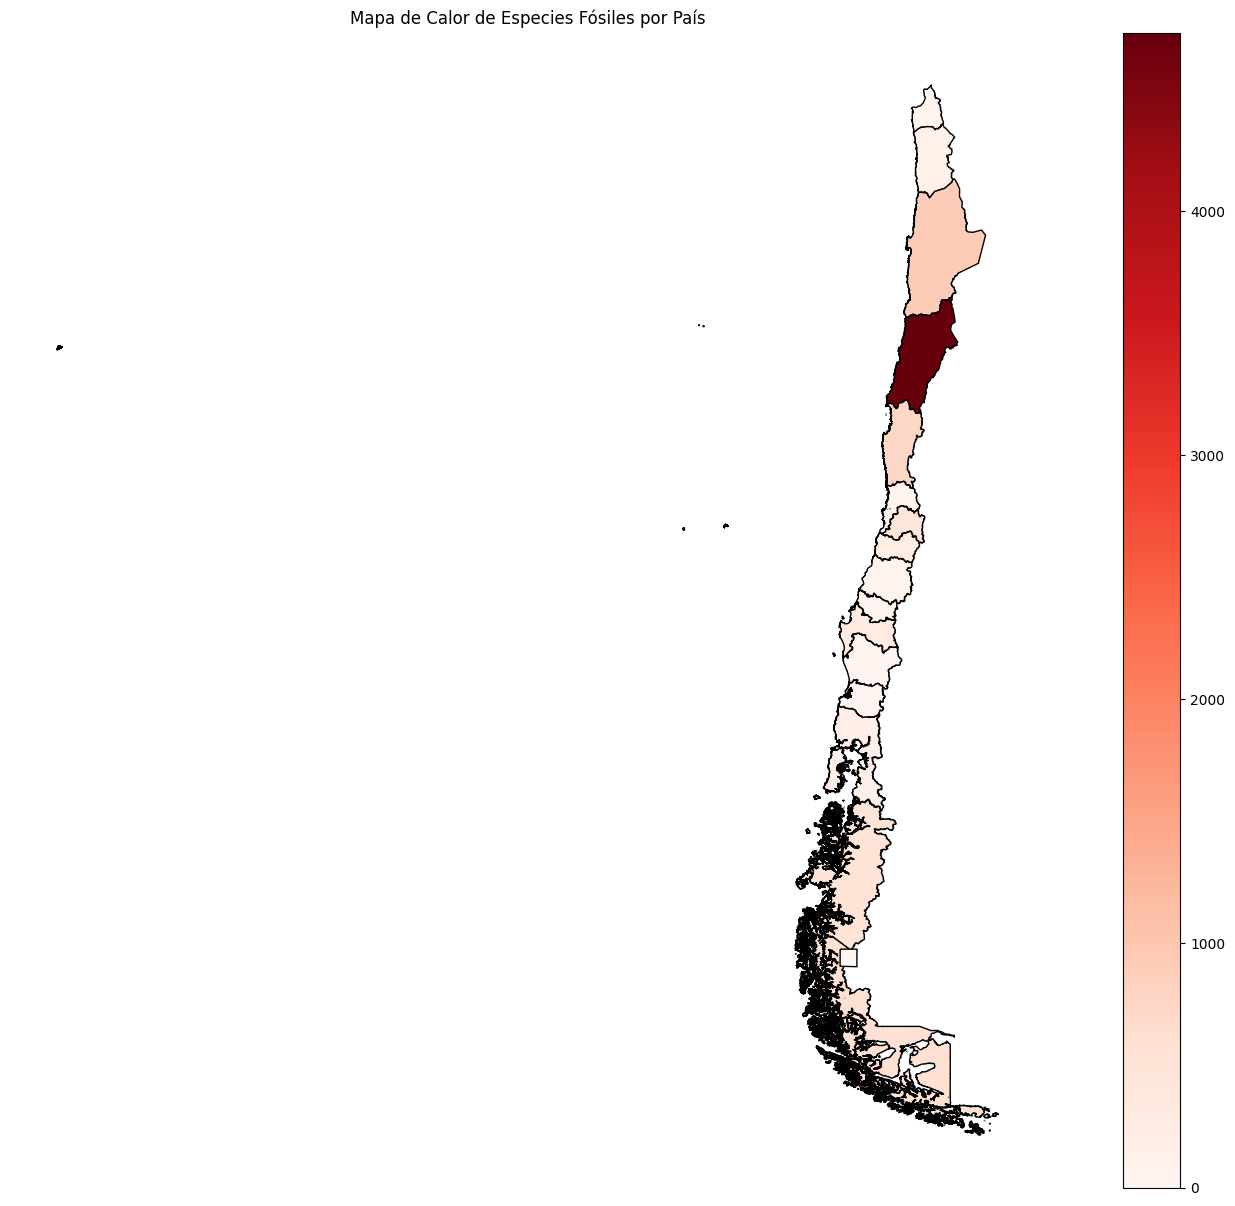

In [241]:
# Cargar el shapefile que representa todo el país
shapefile_path = r'C:\Users\vicen\intro a cs datos\IMT2200-VICENTE-ALVAREZ\Regiones\Regional.shp'
paises = gpd.read_file(shapefile_path).to_crs(4326)

# Concatenar los DataFrames
df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

# Agrupar por región y contar todas las ocurrencias de especies
distribucion = df.groupby('region').agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

# Renombrar la columna 'Region' en el shapefile a 'region'
paises = paises.rename(columns={'Region': 'region'})

# Verificar los tipos de datos
paises['region'] = paises['region'].astype(str)
distribucion['region'] = distribucion['region'].astype(str)

# Combinar los datos de especies con el shapefile
merged = paises.merge(distribucion, on='region', how='left')
merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

# Verifica si hay ocurrencias
print(merged[['region', 'total_ocurrencias']])

# Crear el mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged.plot(column='total_ocurrencias', ax=ax, legend=True,
            cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
            edgecolor='black')

ax.set_title('Mapa de Calor de Especies Fósiles por País')
ax.set_axis_off()  

plt.show()

In [242]:
# Definir la función para asignar provincias
def asignar_provincias(df, lat_col, lng_col, shapefile_path):
    # Cargar el shapefile que contiene las provincias
    provincias = gpd.read_file(shapefile_path).to_crs(4326)

    # Verificar las columnas en el shapefile
    print(provincias.columns)

    # Convertir el DataFrame en un GeoDataFrame
    df['geometry'] = df.apply(lambda row: Point(row[lng_col], row[lat_col]), axis=1)
    geo_df = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

    # Realizar la unión espacial
    resultados_arg = gpd.sjoin(geo_df, provincias, how='left', predicate='intersects')

    # Eliminar la columna 'geometry' si no la necesitas
    resultados_arg = resultados_arg.drop(columns='geometry')

    # Retornar el DataFrame con la nueva columna de provincia
    return resultados_arg


# Ruta al shapefile de provincias de Argentina
shapefile_path = r'C:\Users\vicen\intro a cs datos\IMT2200-VICENTE-ALVAREZ\provincia\provincia.shp'

# Asignar provincias
resultados_arg = asignar_provincias(argentina_df, 'lat', 'lng', shapefile_path)

# Imprimir las columnas de resultados_arg para verificar el nombre correcto
print(resultados_arg.columns)

# Actualizar la columna 'region' en argentina_df usando 'nam' para las provincias
argentina_df['region'] = resultados_arg['nam']  # Usa 'nam' como el nombre de la provincia

# Mostrar el DataFrame actualizado
print(argentina_df[['species_name', 'lat', 'lng', 'region']])
argentina_df = argentina_df.drop(columns='geometry', errors='ignore')

Index(['gid', 'entidad', 'fna', 'gna', 'nam', 'in1', 'fdc', 'sag', 'geometry'], dtype='object')
Index(['species_name', 'occurrence_no', 'accepted_name', 'phylum', 'class',
       'order', 'family', 'genus', 'lat', 'lng', 'diet', 'life_habit',
       'environment', 'taxon_environment', 'primary_name', 'era_early',
       'era_late', 'region', 'index_right', 'gid', 'entidad', 'fna', 'gna',
       'nam', 'in1', 'fdc', 'sag'],
      dtype='object')
          species_name        lat        lng   region
0                  sp. -39.000000 -69.000000  Neuquén
1               rocana -39.000000 -69.000000  Neuquén
2           feruglioli -39.000000 -69.000000  Neuquén
3                  sp. -39.000000 -69.000000  Neuquén
4      mechanquilensis -39.000000 -69.000000  Neuquén
...                ...        ...        ...      ...
31876         cretacea -38.099998 -68.383331  Neuquén
31877     macrocephala -38.099998 -68.383331  Neuquén
31878        excellens -38.099998 -68.383331  Neuquén
31879      

In [243]:
argentina_df

,species_name,occurrence_no,accepted_name,phylum,class,order,family,genus,lat,lng,diet,life_habit,environment,taxon_environment,primary_name,era_early,era_late,region
0,sp.,17744,Nuculana,Mollusca,Bivalvia,Nuculanida,Nuculanidae,Nuculana,-39.000000,-69.000000,"deposit feeder, suspension feeder",infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Nuculana,Cretaceous,No especificado,Neuquén
1,rocana,17745,Cucullaea,Mollusca,Bivalvia,Arcida,Cucullaeidae,Cucullaea,-39.000000,-69.000000,suspension feeder,infaunal,NaN,NaN,Cucullaea,Cretaceous,No especificado,Neuquén
2,feruglioli,17746,Glycymerita,Mollusca,Bivalvia,Arcida,Glycymerididae,Glycymerita,-39.000000,-69.000000,suspension feeder,semi-infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Glycymerita,Cretaceous,No especificado,Neuquén
3,sp.,17747,Glycymerita,Mollusca,Bivalvia,Arcida,Glycymerididae,Glycymerita,-39.000000,-69.000000,suspension feeder,semi-infaunal,NaN,"coastal,inner shelf,outer shelf,oceanic",Glycymerita,Cretaceous,No especificado,Neuquén
4,mechanquilensis,17748,Inoceramus,Mollusca,Bivalvia,Myalinida,Inoceramidae,Inoceramus,-39.000000,-69.000000,suspension feeder,epifaunal,NaN,NaN,Inoceramus,Cretaceous,No especificado,Neuquén
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31876,cretacea,1664301,Guembelitria cretacea,Foraminifera,NO_CLASS_SPECIFIED,Foraminifera,Guembelitriidae,Guembelitria,-38.099998,-68.383331,omnivore,semi-infaunal,marine indet.,NaN,Guembelitria,Cretaceous,No especificado,Neuquén
31877,macrocephala,1664302,Rugoglobigerina macrocephala,Foraminifera,NO_CLASS_SPECIFIED,Foraminifera,Globotruncanidae,Rugoglobigerina,-38.099998,-68.383331,omnivore,semi-infaunal,marine indet.,NaN,Rugoglobigerina,Cretaceous,No especificado,Neuquén
31878,excellens,1664303,Cythereis excellens,Arthropoda,Ostracoda,Podocopida,Trachyleberididae,Cythereis,-38.099998,-68.383331,"detritivore, grazer",epifaunal,marine indet.,"hypersaline,marine,brackish,freshwater",Cythereis,Cretaceous,No especificado,Neuquén
31879,venusta,1664304,Petalocythereis venusta,Arthropoda,Ostracoda,Podocopida,Trachyleberididae,Petalocythereis,-38.099998,-68.383331,"detritivore, grazer",epifaunal,marine indet.,"hypersaline,marine,brackish,freshwater",Anticythereis,Cretaceous,No especificado,Neuquén


Columnas en el shapefile de provincias: Index(['gid', 'entidad', 'fna', 'gna', 'nam', 'in1', 'fdc', 'sag', 'geometry'], dtype='object')
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires               12.0
1                                             Neuquén             4200.0
2                                            San Luis              159.0
3                                            Santa Fe              335.0
4                                            La Rioja              702.0
5                                           Catamarca              520.0
6                                             Tucumán               95.0
7                                               Chaco               32.0
8                                             Formosa                9.0
9                                          Santa Cruz             5118.0
10                                             Chubut        

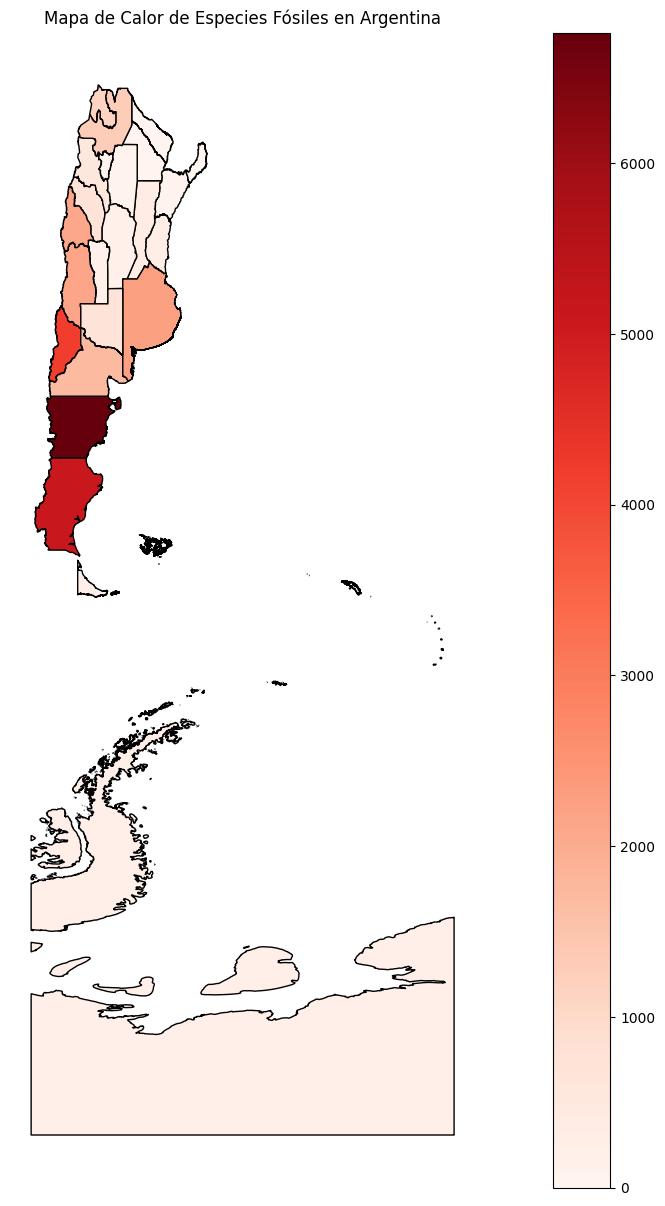

In [ ]:
shapefile_path = r'C:\Users\vicen\intro a cs datos\IMT2200-VICENTE-ALVAREZ\provincia\provincia.shp'
provincias = gpd.read_file(shapefile_path).to_crs(4326)

# Imprimir las columnas del shapefile para verificar
print("Columnas en el shapefile de provincias:", provincias.columns)

# Concatenar los DataFrames
df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

# Agrupar por región y contar todas las ocurrencias de especies
distribucion = df.groupby('region').agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

# Usar la columna que representa la provincia en el shapefile, probablemente 'nam'
provincias['nam'] = provincias['nam'].astype(str)  # Asegurarse de que 'nam' sea de tipo string
distribucion['region'] = distribucion['region'].astype(str)  # Asegurarse de que 'region' sea de tipo string

# Combinar los datos de especies con el shapefile usando 'nam' para provincias
merged = provincias.merge(distribucion, left_on='nam', right_on='region', how='left')
merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

# Verifica si hay ocurrencias
print(merged[['nam', 'total_ocurrencias']])

# Crear el mapa de calor
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged.plot(column='total_ocurrencias', ax=ax, legend=True,
            cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
            edgecolor='black')

ax.set_title('Mapa de Calor de Especies Fósiles en Argentina')
ax.set_axis_off()  

plt.show()

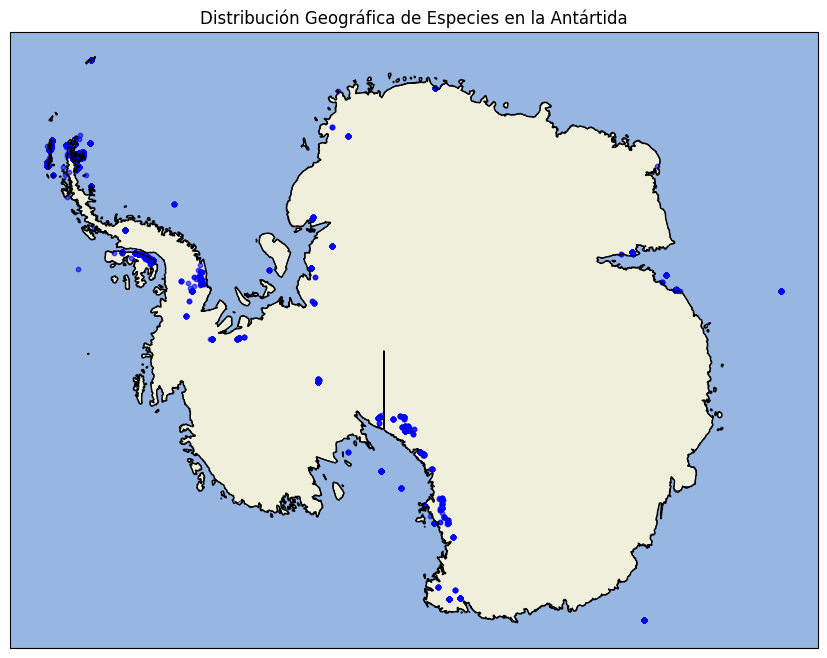

In [245]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Crear un mapa de la Antártida
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

# Dibujar costas y países
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Graficar los puntos
ax.scatter(antartica_df['lng'], antartica_df['lat'], color='blue', alpha=0.6, s=10,
           transform=ccrs.PlateCarree())

# Títulos y etiquetas
plt.title('Distribución Geográfica de Especies en la Antártida')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [246]:
top_eras_chile = chile_df.groupby('era_early').agg({'species_name': 'count'}).reset_index()

# Renombrar la columna para mayor claridad
top_eras_chile.rename(columns={'species_name': 'total_fossils'}, inplace=True)

# Ordenar de mayor a menor y obtener las 5 principales
top_5_eras_chile = top_eras_chile.sort_values(by='total_fossils', ascending=False).head(5)

# Mostrar el resultado
print(top_5_eras_chile)

     era_early  total_fossils
3     Jurassic           5037
4      Neogene           1869
1   Cretaceous           1367
10  Quaternary            610
11    Triassic            254


In [247]:
# Agrupar por era y contar la cantidad de fósiles
top_eras_argentina = argentina_df.groupby('era_early').agg({'species_name': 'count'}).reset_index()

# Renombrar la columna para mayor claridad
top_eras_argentina.rename(columns={'species_name': 'total_fossils'}, inplace=True)

# Ordenar de mayor a menor y obtener las 5 principales
top_5_eras_argentina = top_eras_argentina.sort_values(by='total_fossils', ascending=False).head(5)

# Mostrar el resultado
print(top_5_eras_argentina)

    era_early  total_fossils
7   Paleogene           8020
2  Cretaceous           7080
5     Neogene           6740
6  Ordovician           3357
4    Jurassic           2416


In [248]:
top_eras_antartica = antartica_df.groupby('era_early').agg({'species_name': 'count'}).reset_index()

# Renombrar la columna para mayor claridad
top_eras_antartica.rename(columns={'species_name': 'total_fossils'}, inplace=True)

# Ordenar de mayor a menor y obtener las 5 principales
top_5_eras_antartica = top_eras_antartica.sort_values(by='total_fossils', ascending=False).head(5)

# Mostrar el resultado
print(top_5_eras_antartica)

    era_early  total_fossils
2  Cretaceous           4861
7   Paleogene           3405
4    Jurassic           1794
0    Cambrian            301
9  Quaternary            277


Datos combinados para la era Jurassic:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota               22.0
1                          Región de Tarapacá              107.0
2                       Región de Antofagasta              655.0
3    Región de Magallanes y Antártica Chilena               17.0
4   Región de Aysén del Gral.Ibañez del Campo                9.0
5                           Región de Atacama             3538.0
6                          Región de Coquimbo              184.0
7                        Región de Valparaíso               16.0
8            Región Metropolitana de Santiago              410.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                0.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío                0.0
13                            Región de Ñuble      

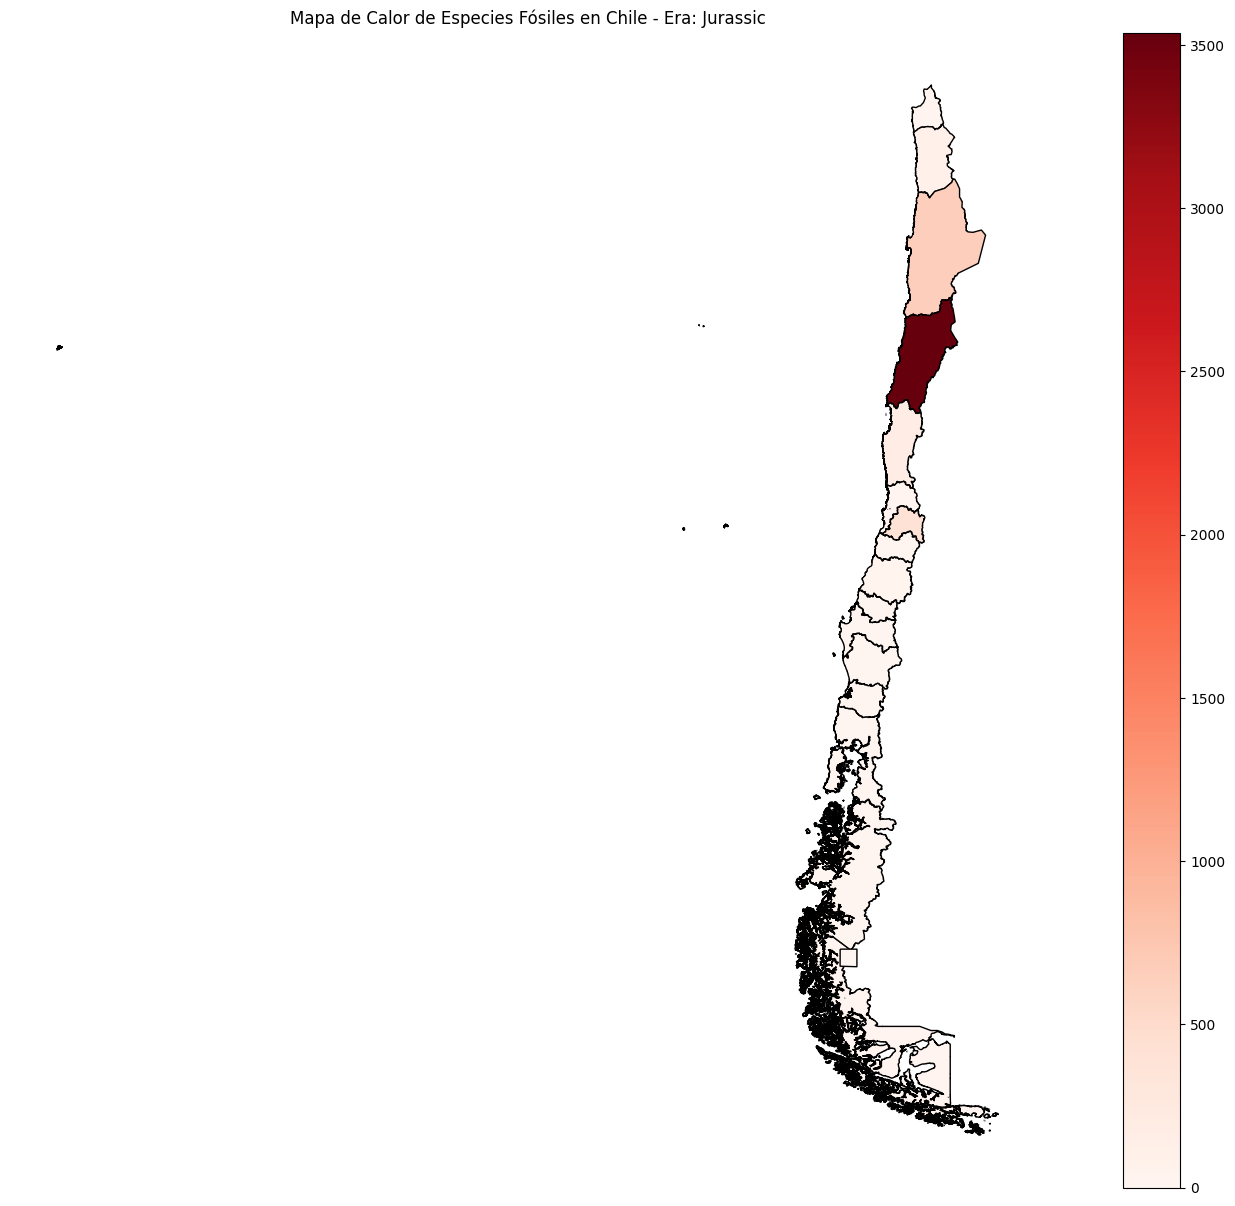

Datos combinados para la era Neogene:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota               25.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta               77.0
3    Región de Magallanes y Antártica Chilena               36.0
4   Región de Aysén del Gral.Ibañez del Campo              487.0
5                           Región de Atacama              333.0
6                          Región de Coquimbo              223.0
7                        Región de Valparaíso               23.0
8            Región Metropolitana de Santiago                6.0
9                         Región de Los Lagos              163.0
10                         Región de Los Ríos                2.0
11                     Región de La Araucanía               11.0
12                         Región del Bío-Bío              108.0
13                            Región de Ñuble       

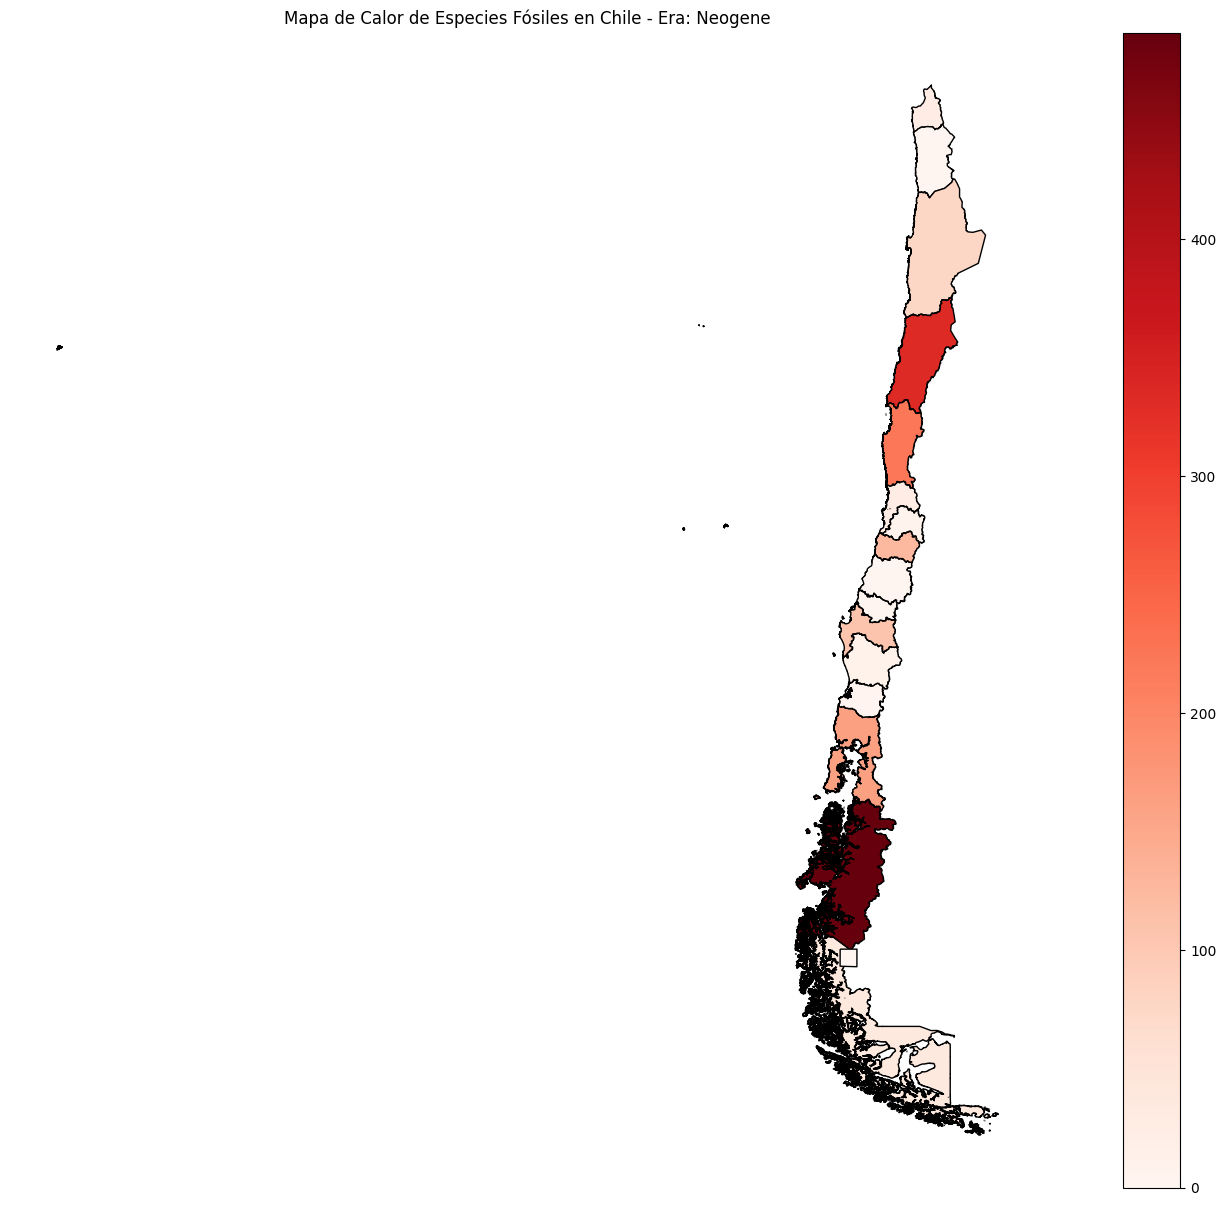

Datos combinados para la era Cretaceous:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                1.0
1                          Región de Tarapacá                7.0
2                       Región de Antofagasta               19.0
3    Región de Magallanes y Antártica Chilena              401.0
4   Región de Aysén del Gral.Ibañez del Campo                0.0
5                           Región de Atacama              433.0
6                          Región de Coquimbo              246.0
7                        Región de Valparaíso                7.0
8            Región Metropolitana de Santiago               31.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                0.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío              102.0
13                            Región de Ñuble    

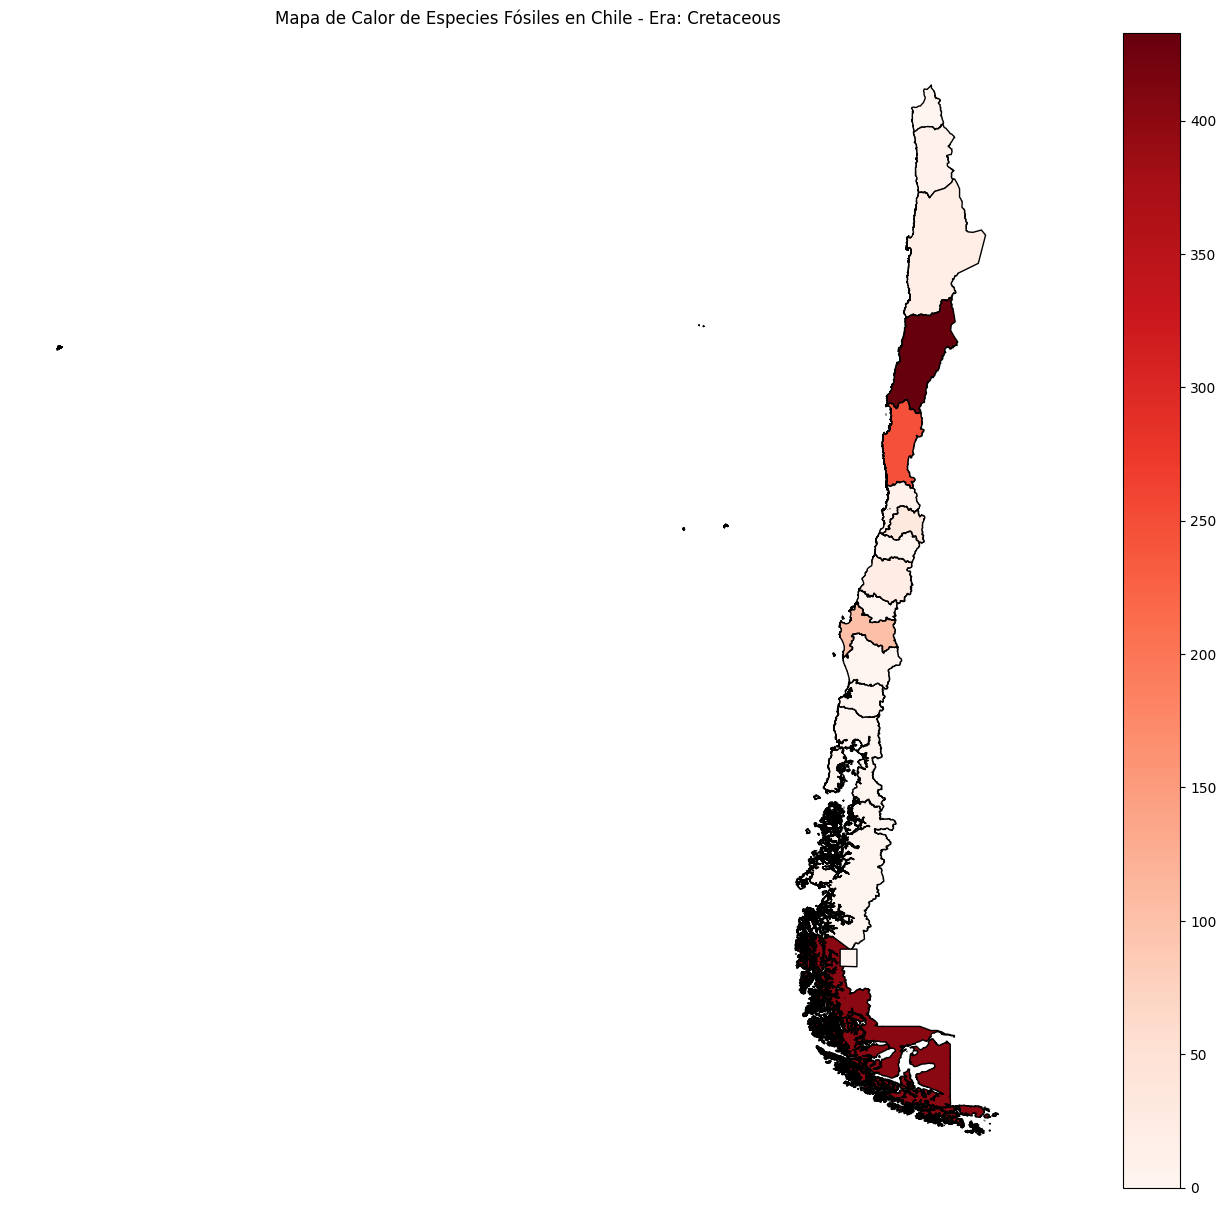

Datos combinados para la era Quaternary:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                2.0
1                          Región de Tarapacá                4.0
2                       Región de Antofagasta               13.0
3    Región de Magallanes y Antártica Chilena               57.0
4   Región de Aysén del Gral.Ibañez del Campo               17.0
5                           Región de Atacama              251.0
6                          Región de Coquimbo               59.0
7                        Región de Valparaíso               10.0
8            Región Metropolitana de Santiago               13.0
9                         Región de Los Lagos               12.0
10                         Región de Los Ríos                5.0
11                     Región de La Araucanía                9.0
12                         Región del Bío-Bío               32.0
13                            Región de Ñuble    

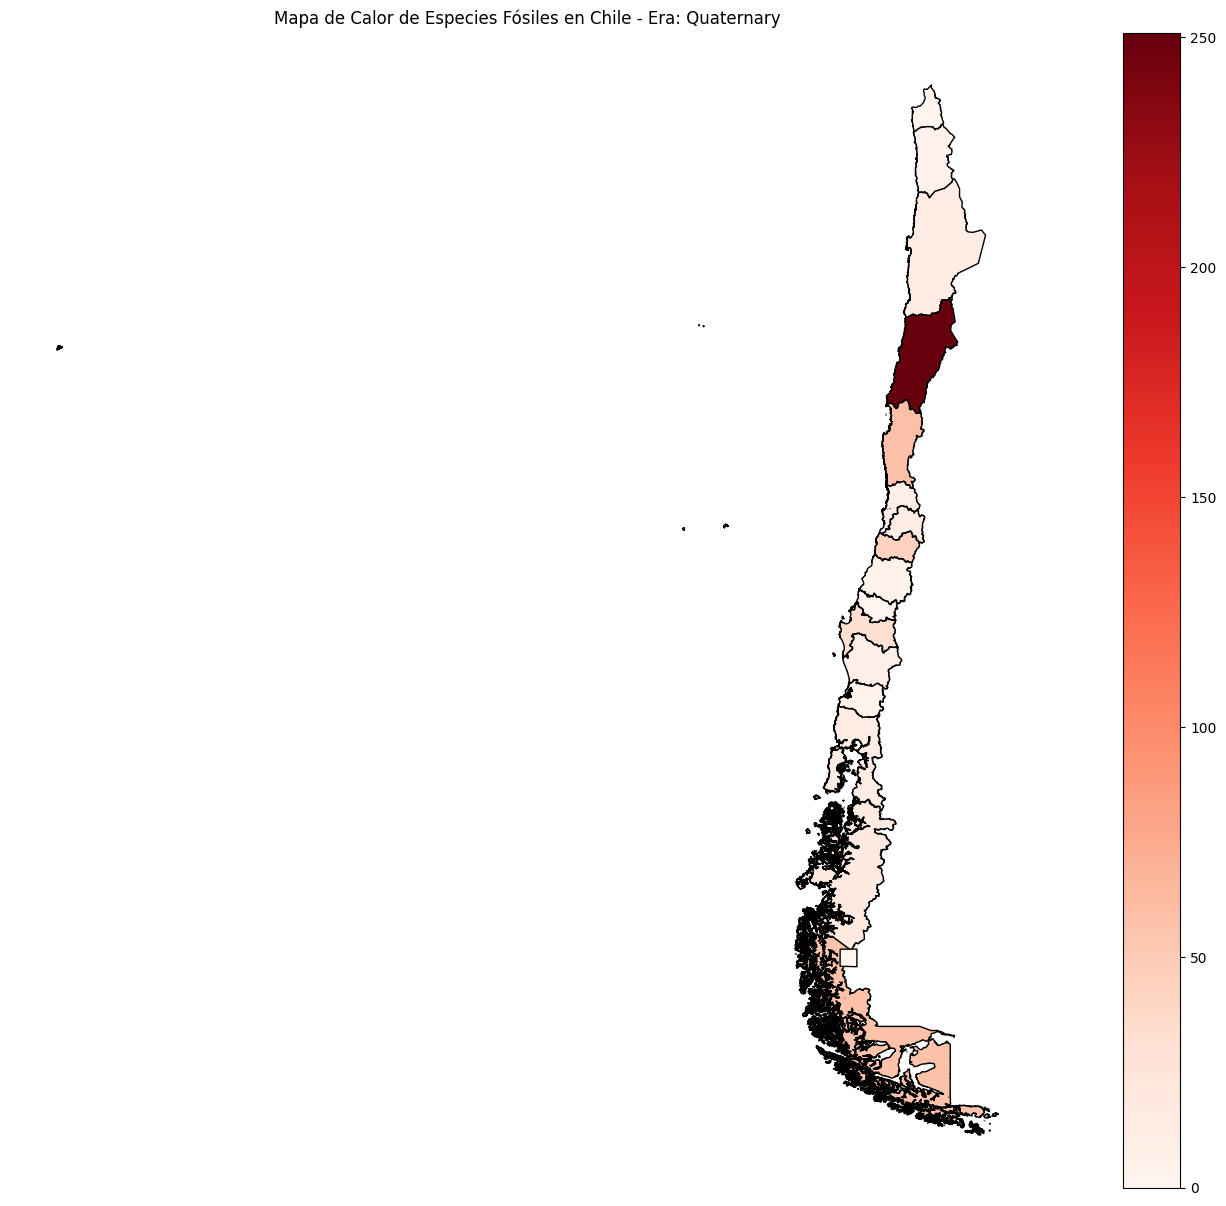

Datos combinados para la era Triassic:
                                       region  total_ocurrencias
0                Región de Arica y Parinacota                0.0
1                          Región de Tarapacá                0.0
2                       Región de Antofagasta               53.0
3    Región de Magallanes y Antártica Chilena                0.0
4   Región de Aysén del Gral.Ibañez del Campo                1.0
5                           Región de Atacama              135.0
6                          Región de Coquimbo                0.0
7                        Región de Valparaíso                4.0
8            Región Metropolitana de Santiago                0.0
9                         Región de Los Lagos                0.0
10                         Región de Los Ríos                5.0
11                     Región de La Araucanía                0.0
12                         Región del Bío-Bío               43.0
13                            Región de Ñuble      

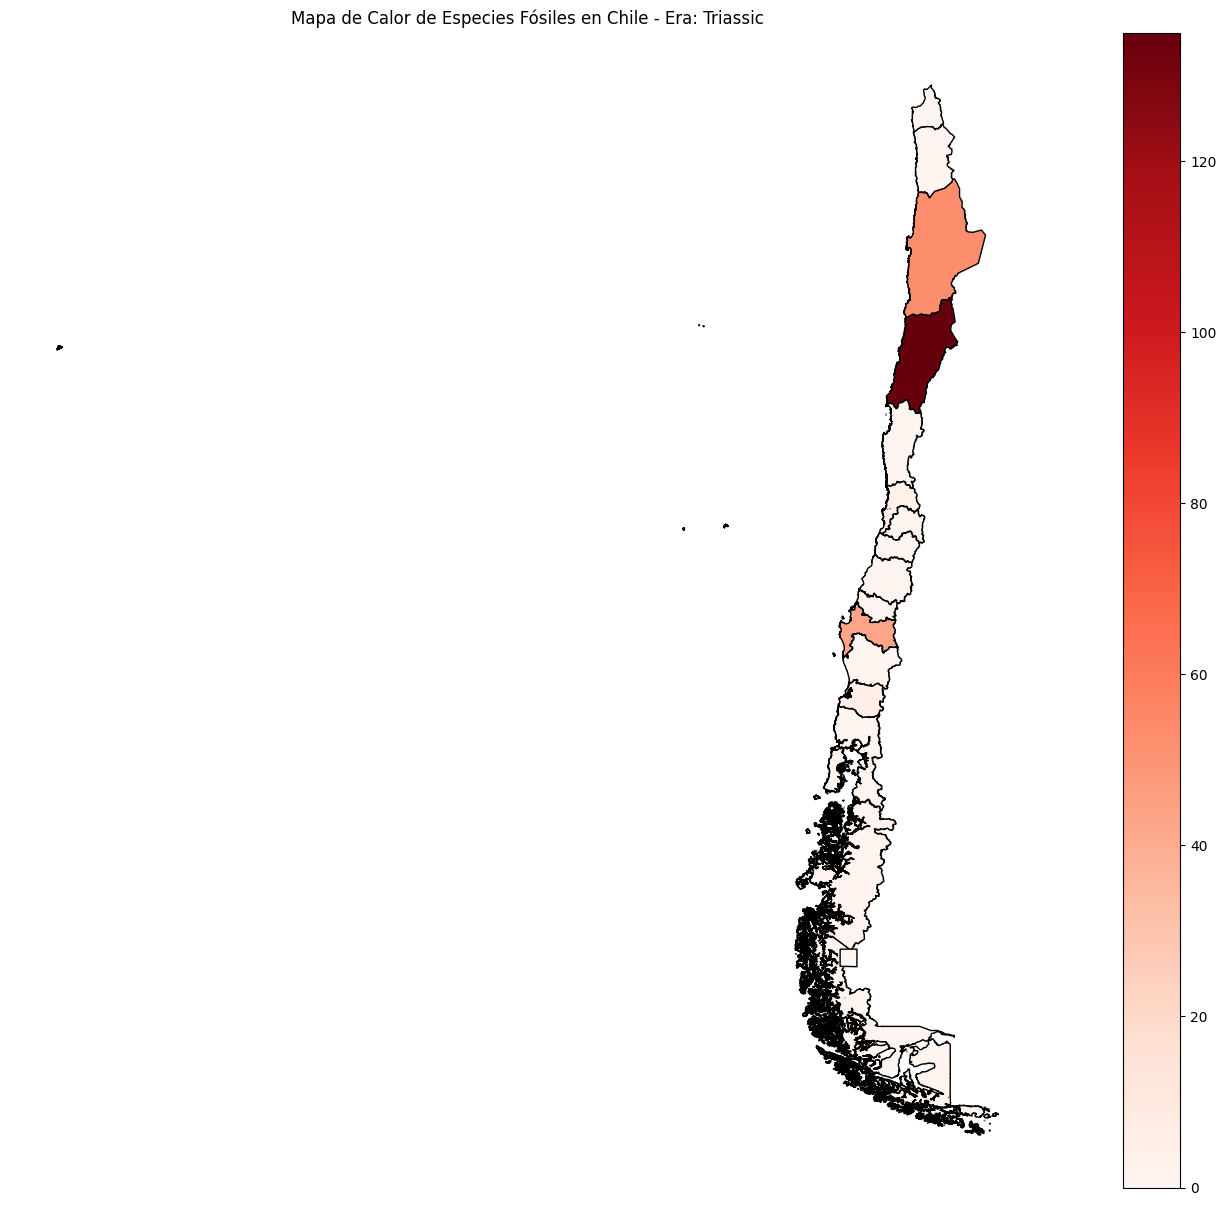

In [255]:
# Cargar el shapefile que representa todo el país
shapefile_path = r'C:\Users\vicen\intro a cs datos\IMT2200-VICENTE-ALVAREZ\Regiones\Regional.shp'
paises = gpd.read_file(shapefile_path).to_crs(4326)

# Concatenar los DataFrames
df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

# Agrupar por región y era, contando las ocurrencias de especies
distribucion = df.groupby(['region', 'era_early']).agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)


# Renombrar la columna 'Region' en el shapefile a 'region'
paises = paises.rename(columns={'Region': 'region'})

# Verificar los tipos de datos
paises['region'] = paises['region'].astype(str)
distribucion['region'] = distribucion['region'].astype(str)

# Crear mapas de calor para cada una de las top 5 eras
for era in top_5_eras_chile['era_early']:
    # Filtrar los datos para la era actual
    distribucion_era = distribucion[distribucion['era_early'] == era]
    
    # Combinar los datos de especies con el shapefile
    merged = paises.merge(distribucion_era, on='region', how='left')
    merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

    # Verificar si hay datos después de la unión
    print(f"Datos combinados para la era {era}:")
    print(merged[['region', 'total_ocurrencias']])

    # Crear el mapa de calor
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged.plot(column='total_ocurrencias', ax=ax, legend=True,
                cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
                edgecolor='black')

    ax.set_title(f'Mapa de Calor de Especies Fósiles en Chile - Era: {era}')
    ax.set_axis_off()

    plt.show()

viendo los mapas de calor que top 5 eras de chile las cuales son (jurasic,neogene,cretaceous,quaternary y triassic)  

C:\Users\vicen\AppData\Local\Temp\ipykernel_2644\906834003.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Paleogene:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén              943.0
2                                            San Luis                0.0
3                                            Santa Fe                0.0
4                                            La Rioja               17.0
5                                           Catamarca               46.0
6                                             Tucumán                8.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz             1084.0
10                                             Chubut             3869.0
11                                            Mendoza              101.0
12         

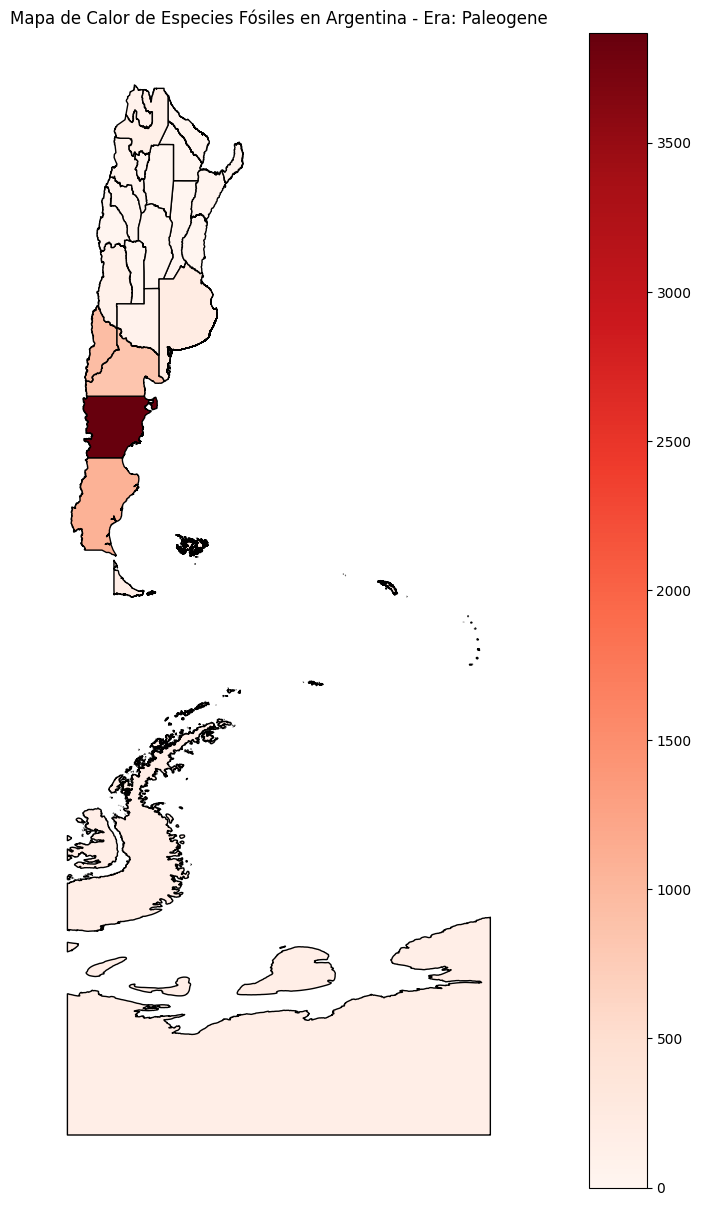

C:\Users\vicen\AppData\Local\Temp\ipykernel_2644\906834003.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Cretaceous:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén             1995.0
2                                            San Luis              101.0
3                                            Santa Fe                0.0
4                                            La Rioja               15.0
5                                           Catamarca                0.0
6                                             Tucumán               19.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz             2069.0
10                                             Chubut             1587.0
11                                            Mendoza              465.0
12        

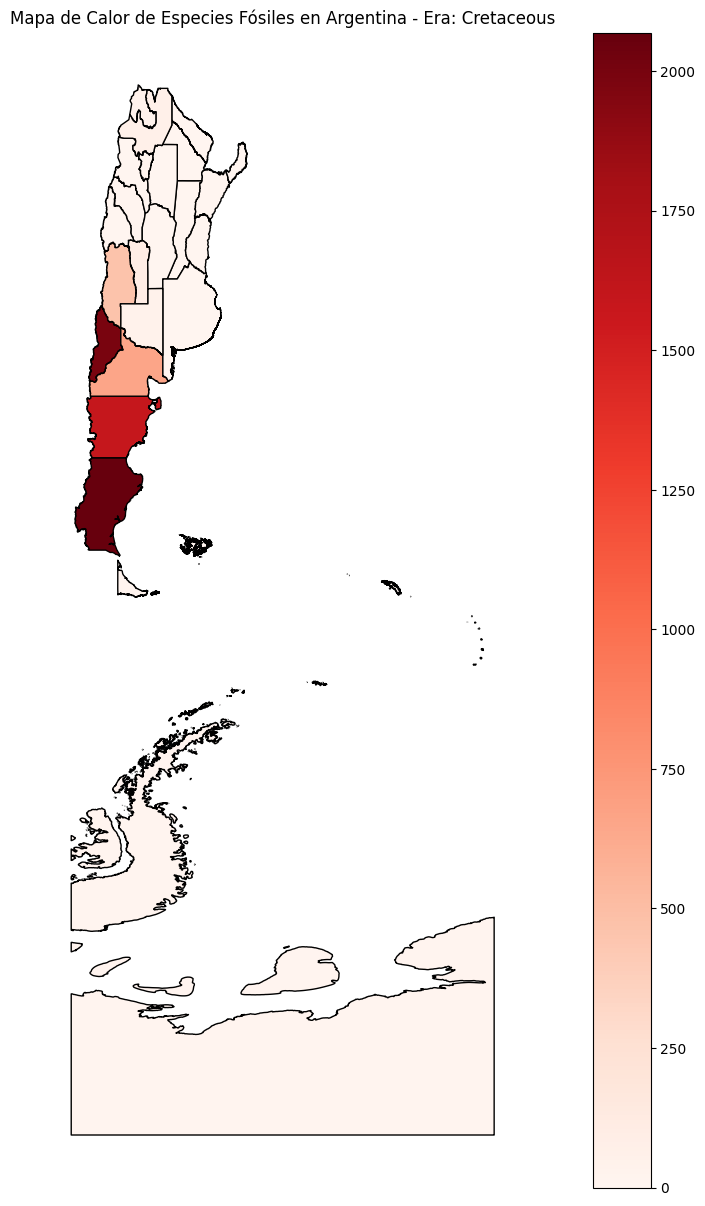

C:\Users\vicen\AppData\Local\Temp\ipykernel_2644\906834003.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Neogene:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén              107.0
2                                            San Luis               17.0
3                                            Santa Fe              247.0
4                                            La Rioja               70.0
5                                           Catamarca              364.0
6                                             Tucumán               29.0
7                                               Chaco                4.0
8                                             Formosa                0.0
9                                          Santa Cruz             1752.0
10                                             Chubut              853.0
11                                            Mendoza              123.0
12           

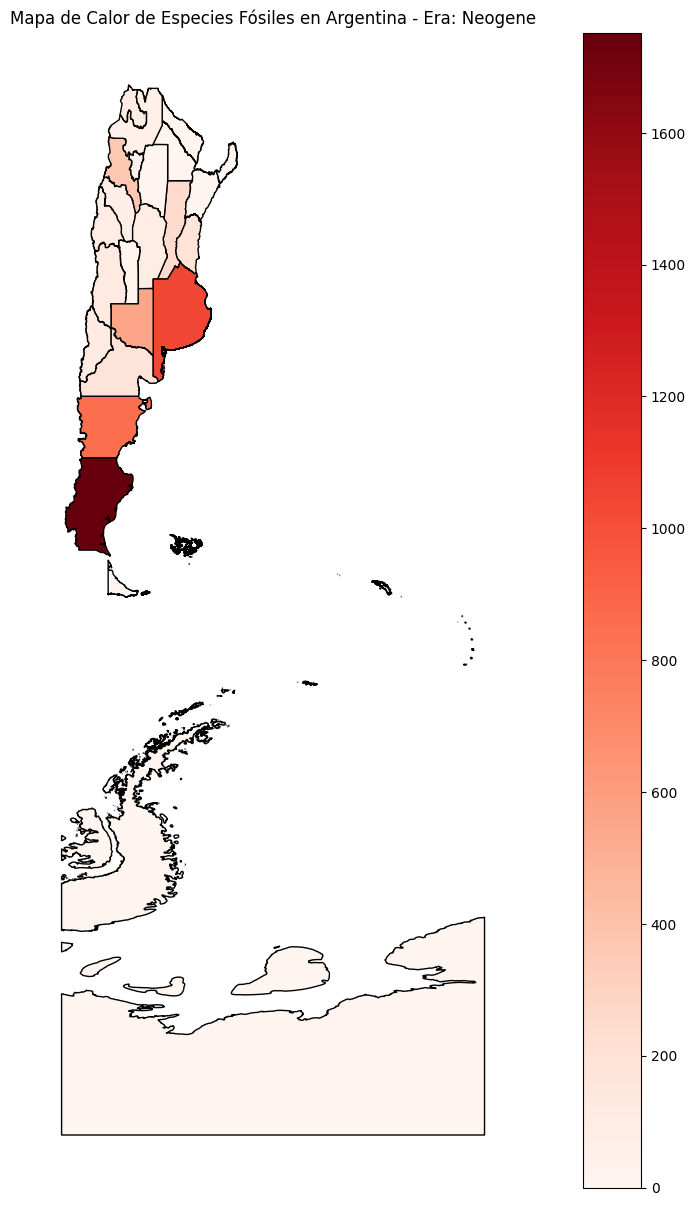

C:\Users\vicen\AppData\Local\Temp\ipykernel_2644\906834003.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Ordovician:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén                0.0
2                                            San Luis               12.0
3                                            Santa Fe                0.0
4                                            La Rioja              218.0
5                                           Catamarca               81.0
6                                             Tucumán                0.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz                0.0
10                                             Chubut                0.0
11                                            Mendoza              105.0
12        

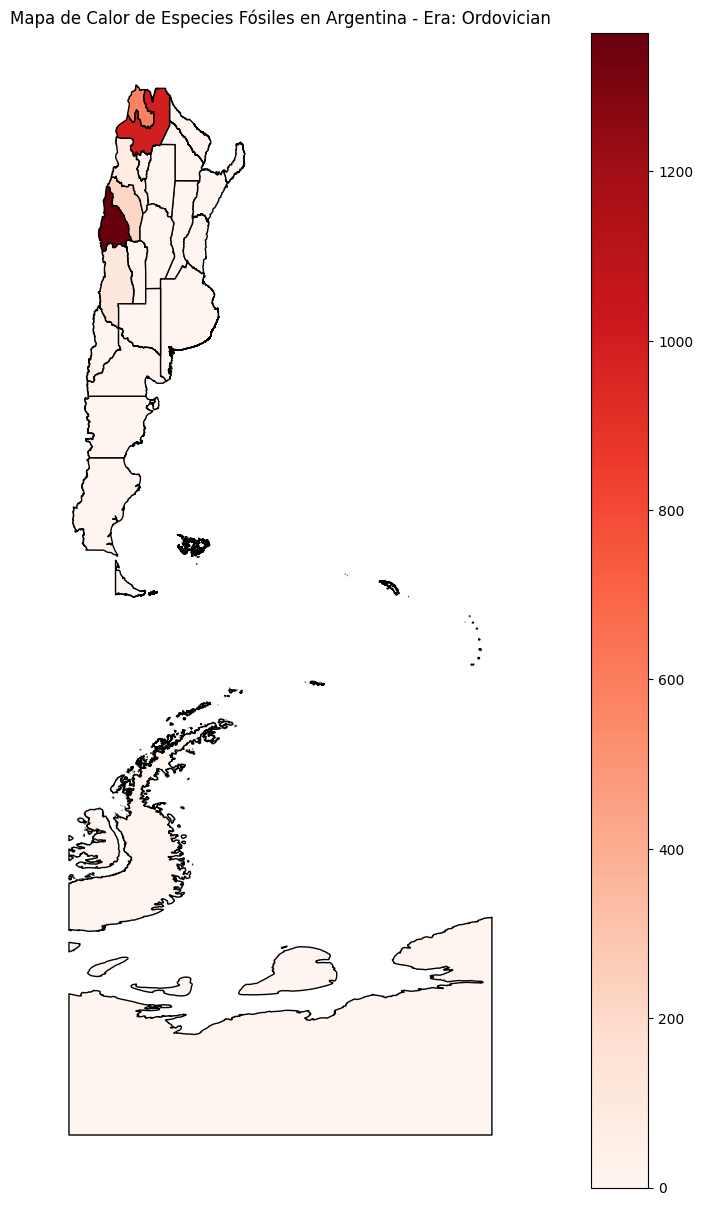

C:\Users\vicen\AppData\Local\Temp\ipykernel_2644\906834003.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  distribucion_era['region'] = distribucion_era['region'].astype(str)


Datos combinados para la era Jurassic:
                                                  nam  total_ocurrencias
0                     Ciudad Autónoma de Buenos Aires                0.0
1                                             Neuquén             1090.0
2                                            San Luis                0.0
3                                            Santa Fe                0.0
4                                            La Rioja                0.0
5                                           Catamarca                0.0
6                                             Tucumán                0.0
7                                               Chaco                0.0
8                                             Formosa                0.0
9                                          Santa Cruz               96.0
10                                             Chubut              220.0
11                                            Mendoza              871.0
12          

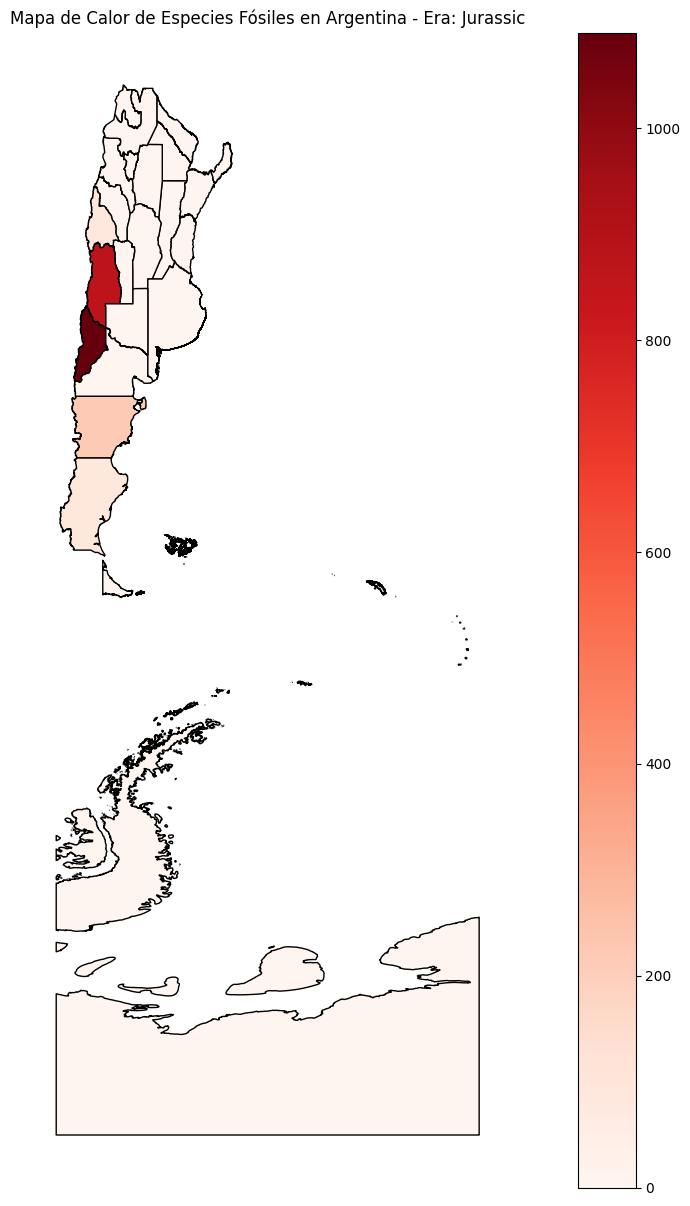

In [263]:
# Cargar el shapefile que representa las provincias de Argentina
shapefile_path = r'C:\Users\vicen\intro a cs datos\IMT2200-VICENTE-ALVAREZ\provincia\provincia.shp'
provincias = gpd.read_file(shapefile_path).to_crs(4326)

# Imprimir las columnas del shapefile para verificar
#print("Columnas en el shapefile de provincias:", provincias.columns)

# Concatenar los DataFrames
df = pd.concat([chile_df, argentina_df, antartica_df], ignore_index=True)

# Agrupar por región y era, contando todas las ocurrencias de especies
distribucion = df.groupby(['region', 'era_early']).agg({'species_name': 'count'}).reset_index()
distribucion.rename(columns={'species_name': 'total_ocurrencias'}, inplace=True)

# Asegurarse de que 'nam' en el shapefile sea de tipo string
provincias['nam'] = provincias['nam'].astype(str)

# Crear mapas de calor para cada una de las top 5 eras
for era in top_5_eras_argentina['era_early']:
    # Filtrar los datos para la era actual
    distribucion_era = distribucion[distribucion['era_early'] == era]

    # Asegurarse de que 'region' sea de tipo string
    distribucion_era['region'] = distribucion_era['region'].astype(str)

    # Combinar los datos de especies con el shapefile usando 'nam' para provincias
    merged = provincias.merge(distribucion_era, left_on='nam', right_on='region', how='left')
    merged['total_ocurrencias'] = merged['total_ocurrencias'].fillna(0)

    # Verifica si hay ocurrencias
    print(f"Datos combinados para la era {era}:")
    print(merged[['nam', 'total_ocurrencias']])

    # Crear el mapa de calor
    fig, ax = plt.subplots(1, 1, figsize=(20, 15))
    merged.plot(column='total_ocurrencias', ax=ax, legend=True,
                cmap='Reds', vmin=0, vmax=merged['total_ocurrencias'].max(),
                edgecolor='black')

    ax.set_title(f'Mapa de Calor de Especies Fósiles en Argentina - Era: {era}')
    ax.set_axis_off()

    plt.show()

Eras únicas en el top 5: ['Cretaceous' 'Jurassic' 'Paleogene' 'Cambrian' 'Quaternary']


C:\Users\vicen\AppData\Local\Temp\ipykernel_2644\2119345952.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_eras))  # Cambia 'tab10' si deseas otro colormap


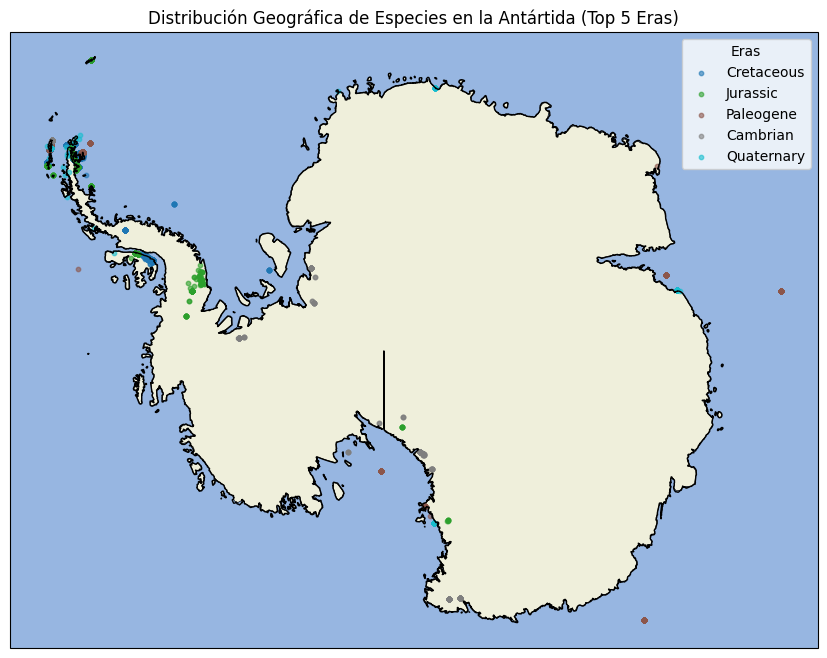

In [267]:
top_5_eras_antartica = ['Cretaceous', 'Paleogene', 'Jurassic', 'Cambrian', 'Quaternary']

# Filtrar el DataFrame para incluir solo las top 5 eras
antartica_top5 = antartica_df[antartica_df['era_early'].isin(top_5_eras_antartica)]

# Obtener las eras únicas en el DataFrame filtrado
unique_eras = antartica_top5['era_early'].unique()
print("Eras únicas en el top 5:", unique_eras)

# Crear un colormap
colors = plt.cm.get_cmap('tab10', len(unique_eras))  # Cambia 'tab10' si deseas otro colormap
era_colors = {era: colors(i) for i, era in enumerate(unique_eras)}

# Crear un mapa de la Antártida
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.SouthPolarStereo())

# Dibujar costas y países
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Graficar los puntos con colores según la era
for era in unique_eras:
    subset = antartica_top5[antartica_top5['era_early'] == era]
    ax.scatter(subset['lng'], subset['lat'], color=era_colors[era], alpha=0.6, s=10,
               label=era, transform=ccrs.PlateCarree())

# Añadir una leyenda
plt.legend(title='Eras', loc='upper right')

# Títulos y etiquetas
plt.title('Distribución Geográfica de Especies en la Antártida (Top 5 Eras)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

en la punta es donde se ubica la mayoria de centros cientificos (la mayoria chilenos)

Análisis de la Distribución de Especies Fósiles
1. Jurassic
Chile: Las ocurrencias son variadas, con regiones como Antofagasta y la Región Metropolitana mostrando números significativos (655 y 410, respectivamente).
Argentina: Aquí, Neuquén presenta un número alto de 1090 ocurrencias, lo que sugiere una rica biodiversidad en esta era. Sin embargo, muchas regiones de Argentina reportan cero ocurrencias.
2. Neogene
Chile: La región de Aysén destaca con 487 ocurrencias, pero la distribución es desigual, con algunas regiones mostrando cero fósiles.
Argentina: Santa Cruz y Chubut tienen cifras elevadas (1752 y 853), indicando una concentración de fósiles en el sur del país. Esto podría relacionarse con la geografía y la historia geológica de la región.
3. Cretaceous
Chile: La región de Atacama es notable con 4338 ocurrencias, lo que la convierte en un punto caliente para esta era. Otras regiones como Antofagasta y Magallanes también tienen cifras relevantes.
Argentina: Neuquén y Santa Cruz son las más destacadas con 1995 y 2069 ocurrencias. La alta cantidad en estas regiones sugiere condiciones favorables para la preservación de fósiles.
4. Paleogene
Chile: No se reportan datos para esta era.
Argentina: Chubut es la región con el mayor número (3869), lo que indica un potencial alto de biodiversidad en el pasado.
5. Ordovician
Argentina: La región de Salta tiene 995 ocurrencias, lo que sugiere una rica diversidad de fósiles de esta era, mientras que otras regiones presentan escasez.

Conclusiones Generales
Concentración Regional: Tanto en Chile como en Argentina, hay regiones específicas que destacan por su riqueza en fósiles, como Atacama en Chile y Chubut en Argentina. Esto señala la importancia de ciertas áreas geográficas en la preservación de la biodiversidad a lo largo del tiempo.
Desigualdad en la Distribución: Las cifras muestran una gran disparidad en la cantidad de fósiles entre diferentes regiones y entre los dos países, lo que puede reflejar factores como la erosión, la sedimentación, y la actividad tectónica.
Implicaciones Ecológicas: Las altas concentraciones de fósiles en ciertas eras y regiones sugieren que estos ecosistemas eran particularmente favorables para la vida en esos momentos, a menudo debido a condiciones climáticas y geológicas específicas.
Este análisis resalta la complejidad de la evolución de las especies en el tiempo y el espacio, y cómo la geografía actual puede influir en la distribución de fósiles antiguos.